# Pokemon Type Analysis
John Gao, Matt Bae

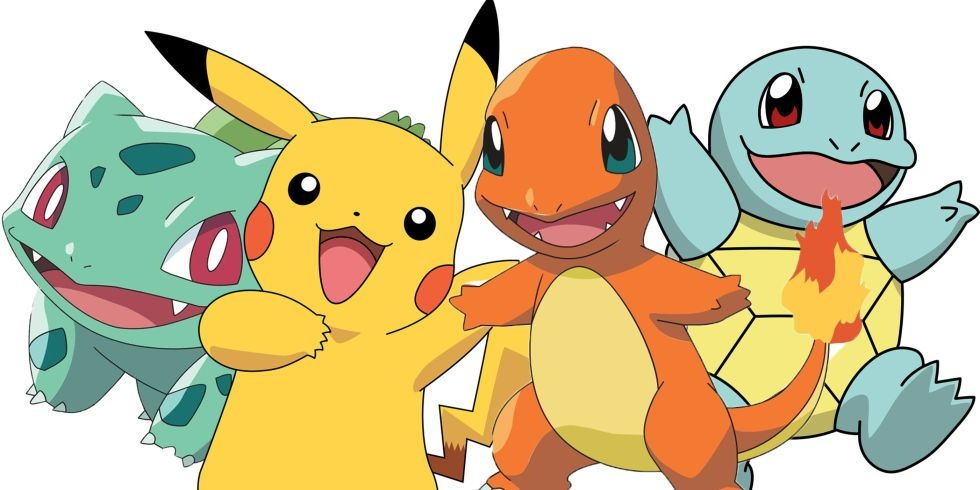

## I. Introduction to Pokemon
Pokemon is a Japanese franchise founded in 1995 and has since grown from a small regional brand to a global icon. The franchise includes many different products such as trading cards, figurines, plushies, music, theme parks, and more. The most popular merchandise is the Pokemon video games. With the creation of portable video game systems such as the GameBoy and DS, these video games have continuously gone under development. The premise of the game is for a user to travel across a designated region, catching and training new Pokemon for their 6 man team while they attempt to beat bosses known as Gym Leaders. The final goal is to beat a group of 5 end game bosses back to back in order to be recognized as the Champion, the strongest trainer in the region.

The video game series is currently on Generation 8 with the release of Pokemon Sword and Shield on the Nintendo Switch. Despite users being able to experience a personal journey of their own, there has existed a global competitive scene since the creation of the games. With every generation, new Pokemon come and go on the list of top contenders for that season. Trainers spend copious amounts of time training up their Pokemon to possess optimal stats and movesets. Sometimes the community sees a rogue contender due to creative strategies, but often times Pokemon usage is determined by the moves and stats that are bestowed upon them by the game creators. In this tutorial, we will be applying the data science pipeline on the complete list of Pokemon. We will be examining if the effectivity of a Pokemon member can be determined by its stats compared to other Pokemon in the game. 

Don't worry if you don't understand the concept of Pokemon or any game mechanics: we will be primarily focusing on the data science application in this tutorial. Some background Pokemon knowledge may be helpful in understanding what numbers mean, but we will be explaining everything in depth so that anybody may understand!

In this tutorial, we will...
- Find a data source (i.e Pokedex) and clean it up for usage
- Perform exploratory data analysis to look for patterns in Pokemon stats. Specifically, we will be comparing overall stats for each generation and tracking changes over time for each type
- Use linear regression to predict future generations stats of Pokemon

Before we go any further, this is just a disclaimer that this is not the only way to do the operations presented in this tutorial. Many of the things done can be done in a more concise fashion.

## II. Resources

As with any job, we need the right tools to do what we need or want to do. Python has many community libraries to aid in the data science pipeline (i.e transforming and working with data to answer some questions). The following are the packages that we will be using, so feel free to click on each to learn more about them.
1. [Pandas](https://pandas.pydata.org/docs/)
2. [Numpy](https://numpy.org/doc/)
3. [Matplotlib](https://matplotlib.org/)
4. [Seaborn](https://seaborn.pydata.org/)
5. [xlrd](https://xlrd.readthedocs.io/en/latest/)
6. [Sklearn](https://scikit-learn.org/stable/)

## III. Collecting and Tidying Data
There are multiple ways of collecting data for usage: utilizing APIs, downloading data sets, running observations etc. There is a widely popular Pokemon dataset on [Kaggle.com](https://www.kaggle.com/abcsds/pokemon), a site that features various datasets. However, this dataset only included Pokemon up to generation 6 (the franchise is currently on generation 8). In addition, we acknowledge that it is not appealing to make an account for a one time usage. As such, we will be pulling our data from other community sources. There is a great [formatted and complete Pokemon list](https://pokemondb.net/pokedex/all) that we will be using. An experienced data scientist will naturally jump into scraping data from this page or similar pages. **However, we want to show that there are always alternatives to every method.** Noticing that the data is already neatly formatted into a table element, we instead copied and pasted this data into a local excel file to import into our Jupyter Notebook. Another reason why we did this was because we wanted to manually edit some entries in the data that we would not otherwise be able to easily do has we scrapped it from the web. Some Pokemon stats change in battle when their ability activates, so we would not want to skew our calculations. We applied our knowledge of the subject in order to remove such entries from our data before importing it.

In this part, we will be importing this pokedex into a dataframe and doing preliminary cleanup to make it more usable. We will be iterating over every row, and be looking for Mega, Alolan, and Galarian names. These 3 groups have multiple members, and members needed to have names edited. In later generations, some Pokemon had regional forms that fell under one of these categories. Regardless if this was an excel or scraped file, the original source had these correct names listed as secondary names underneath. One row would contain all the main information such as stats, but then the row beneath it would contain additional information on if the pokemon was one of these 3 groups. We changed the name of the first row to the second row of the pair to make the names more accurate. However, some Pokemon also had two types and the second type would be located in the second row as well. If this second row's ID number was NaN, then we would also insert this info into the previous observation. 

In [2]:
#Importing packages we need for this part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('CompleteDex.xlsx') #Importing our data from the prepared excel file
df.columns = ["ID", "Name", "Type(s)", "Total Stat Values", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"] #Renaming the columns to be more useful
for index, row in df.iterrows():
    if "Mega" in str(row["Name"])[:4]: #If the name is mega, then the previous observation's name needs to include this
        df.at[index-1,"Name"] = str(row["Name"])
    if "Alolan" in str(row["Name"])[:6]: #If the name is alolan, then the previous observation's name needs to include this
        df.at[index-1,"Name"] = str(row["Name"])
    if "Galarian" in str(row["Name"])[:8]: #If the name is galarian, then the previous observation's name needs to include this
        df.at[index-1,"Name"] = str(row["Name"]) 
    if type(row["ID"]) == float and np.isnan(row["ID"]): #If this row's ID is null, then see if we need to insert this row's type into previous
        if pd.isnull(row["Type(s)"]):
            df.at[index-1,"Type(s)"] = str(df.at[index-1,"Type(s)"])
        else:
            df.at[index-1,"Type(s)"] = str(df.at[index-1,"Type(s)"]) + "/" + str(row["Type(s)"])
        df = df.drop(index) #Drop the row because this row is now a duplicate
df

ID                  Name        Type(s)  Total Stat Values     HP  \
0       1.0             Bulbasaur   GRASS/POISON              318.0   45.0   
2       2.0               Ivysaur   GRASS/POISON              405.0   60.0   
4       3.0              Venusaur   GRASS/POISON              525.0   80.0   
6       3.0         Mega Venusaur   GRASS/POISON              625.0   80.0   
8       4.0            Charmander           FIRE              309.0   39.0   
...     ...                   ...            ...                ...    ...   
1589  896.0             Glastrier            ICE              580.0  100.0   
1590  897.0             Spectrier          GHOST              580.0  100.0   
1591  898.0               Calyrex  PSYCHIC/GRASS              500.0  100.0   
1593  898.0     Calyrex Ice Rider    PSYCHIC/ICE              680.0  100.0   
1595  898.0  Calyrex Shadow Rider  PSYCHIC/GHOST              680.0  100.0   

      Attack  Defense  Sp. Atk  Sp. Def  Speed  
0       49.0     49.0     65.0     65.0   45.0  
2       62.0     63.0     80.0     80.0   60.0  
4       82.0     83.0    100.0    100.0   80.0  
6      100.0    123.0    122.0    120.0   80.0  
8       52.0     43.0     60.0     50.0   65.0  
...      ...      ...      ...      ...    ...  
1589   145.0    130.0     65.0    110.0   30.0  
1590    65.0     60.0    145.0     80.0  130.0  
1591    80.0     80.0     80.0     80.0   80.0  
1593   165.0    150.0     85.0    130.0   50.0  
1595    85.0     80.0    165.0    100.0  150.0  

[1021 rows x 10 columns]

Great! Now we have a complete Pokedex of every species and its associated stats. Some pokemon changed in battle and had stat changes associated with it, but we did not include these because these second group of stats would skew any set of data that we perform analysis on. If a pokemon could change forms in between battles based upon the user's choosing, then we did include this because they would be 2 separate entities with different considerations associated with them. We now have another dataset to work with. In the competitive scene, the utility of a pokemon typically falls into one of 5 main categories: physical sweeper, special sweeper, wall, physical tank, and special tank. This [dataset](https://pokemondb.net/pokedex/stats/combo) in particular features a calculated value of each pokemon's potential to fulfill one of these 5 community recognized role. However, we're going to be smart of this here. We could clean up this dataset the same way we did above in the previous code section. This would also require a lot of manual checking. However, if we look at the top of the link, we notice how each value is calculated. We can replicate this value in our existing dataframe by doing these calculations with a few lines of code. A better question is why are we doing this? We're not just interested in seeing how every pokemon compares to each other and its fellow type compatriots; rather, we're also interested in seeing how the community perceives the worth of every individual species.

In [140]:
df["Ph. Sweeper"] = df["Attack"] + df["Speed"]
df["Sp. Sweeper"] = df["Sp. Atk"] + df["Speed"]
df["Wall"] = df["HP"] + df["Defense"] + df["Sp. Def"]
df["Ph. Tank"] = df["Attack"] + df["Defense"]
df["Sp. Tank"] = df["Sp. Atk"] + df["Sp. Def"]
df["Total Role"] = df["Ph. Sweeper"] + df["Sp. Sweeper"] + df["Wall"] + df["Ph. Tank"] + df["Sp. Tank"] #Total community valued battle potential
df

ID                  Name        Type(s)  Total Stat Values     HP  \
0       1.0             Bulbasaur   GRASS/POISON              318.0   45.0   
2       2.0               Ivysaur   GRASS/POISON              405.0   60.0   
4       3.0              Venusaur   GRASS/POISON              525.0   80.0   
6       3.0         Mega Venusaur   GRASS/POISON              625.0   80.0   
8       4.0            Charmander           FIRE              309.0   39.0   
...     ...                   ...            ...                ...    ...   
1589  896.0             Glastrier            ICE              580.0  100.0   
1590  897.0             Spectrier          GHOST              580.0  100.0   
1591  898.0               Calyrex  PSYCHIC/GRASS              500.0  100.0   
1593  898.0     Calyrex Ice Rider    PSYCHIC/ICE              680.0  100.0   
1595  898.0  Calyrex Shadow Rider  PSYCHIC/GHOST              680.0  100.0   

      Attack  Defense  Sp. Atk  Sp. Def  Speed  Ph. Sweeper  Sp. Sweeper  \
0       49.0     49.0     65.0     65.0   45.0         94.0        110.0   
2       62.0     63.0     80.0     80.0   60.0        122.0        140.0   
4       82.0     83.0    100.0    100.0   80.0        162.0        180.0   
6      100.0    123.0    122.0    120.0   80.0        180.0        202.0   
8       52.0     43.0     60.0     50.0   65.0        117.0        125.0   
...      ...      ...      ...      ...    ...          ...          ...   
1589   145.0    130.0     65.0    110.0   30.0        175.0         95.0   
1590    65.0     60.0    145.0     80.0  130.0        195.0        275.0   
1591    80.0     80.0     80.0     80.0   80.0        160.0        160.0   
1593   165.0    150.0     85.0    130.0   50.0        215.0        135.0   
1595    85.0     80.0    165.0    100.0  150.0        235.0        315.0   

       Wall  Ph. Tank  Sp. Tank  Total Role  
0     159.0      98.0     130.0       591.0  
2     203.0     125.0     160.0       750.0  
4     263.0     165.0     200.0       970.0  
6     323.0     223.0     242.0      1170.0  
8     132.0      95.0     110.0       579.0  
...     ...       ...       ...         ...  
1589  340.0     275.0     175.0      1060.0  
1590  240.0     125.0     225.0      1060.0  
1591  260.0     160.0     160.0       900.0  
1593  380.0     315.0     215.0      1260.0  
1595  280.0     165.0     265.0      1260.0  

[1021 rows x 16 columns]

Now there's one more thing we have to do for our tables: give every pokemon a generation value indicating what generation they are from. Because the way the national pokedex is set up, pokemon with alternate forms (i.e mega, galarian, and alola) share the same ID value as their previous predecessors despite being of a later generation. As such, we will be assigning a generation value based upon their ID range AND by the first parts of their names.

In [141]:
df["Generation"] = 0 #Give everything a default value for now so that we can go back and change it
"""
Generation 1: 1-151
Generation 2: 152-251
Generation 3: 252-386
Generation 4: 387-493
Generation 5: 494-649
Generation 6 + Mega: 650-721
Generation 7 + Alolan: 722-809
Generation 8 + Galarian: 810-898
""";
for index, row in df.iterrows():
    if str(row["Name"])[:4] == "Mega":
        df.at[index,"Generation"] = 6
        continue
    if str(row["Name"])[:6] == "Alolan":
        df.at[index,"Generation"] = 7
        continue
    if str(row["Name"])[:8] == "Galarian":
        df.at[index,"Generation"] = 8
        continue
    if 1 <= int(row["ID"]) <= 151:
        df.at[index,"Generation"] = 1
    elif 152 <= int(row["ID"]) <= 251:
        df.at[index,"Generation"] = 2
    elif 252 <= int(row["ID"]) <= 386:
        df.at[index,"Generation"] = 3
    elif 387 <= int(row["ID"]) <= 493:
        df.at[index,"Generation"] = 4
    elif 494 <= int(row["ID"]) <= 649:
        df.at[index,"Generation"] = 5
    elif 650 <= int(row["ID"]) <= 721:
        df.at[index,"Generation"] = 6
    elif 722 <= int(row["ID"]) <= 809:
        df.at[index,"Generation"] = 7
    elif 810 <= int(row["ID"]) <= 898:
        df.at[index,"Generation"] = 8
df["ID"] = df["ID"].astype(int) #No reason ID should be a float
df
#df.loc[df['Name'] == "Galarian Darmanitan"] #Test case: let's see if an alternate form was properly sorted for based upon edge case

ID                  Name        Type(s)  Total Stat Values     HP  \
0       1             Bulbasaur   GRASS/POISON              318.0   45.0   
2       2               Ivysaur   GRASS/POISON              405.0   60.0   
4       3              Venusaur   GRASS/POISON              525.0   80.0   
6       3         Mega Venusaur   GRASS/POISON              625.0   80.0   
8       4            Charmander           FIRE              309.0   39.0   
...   ...                   ...            ...                ...    ...   
1589  896             Glastrier            ICE              580.0  100.0   
1590  897             Spectrier          GHOST              580.0  100.0   
1591  898               Calyrex  PSYCHIC/GRASS              500.0  100.0   
1593  898     Calyrex Ice Rider    PSYCHIC/ICE              680.0  100.0   
1595  898  Calyrex Shadow Rider  PSYCHIC/GHOST              680.0  100.0   

      Attack  Defense  Sp. Atk  Sp. Def  Speed  Ph. Sweeper  Sp. Sweeper  \
0       49.0     49.0     65.0     65.0   45.0         94.0        110.0   
2       62.0     63.0     80.0     80.0   60.0        122.0        140.0   
4       82.0     83.0    100.0    100.0   80.0        162.0        180.0   
6      100.0    123.0    122.0    120.0   80.0        180.0        202.0   
8       52.0     43.0     60.0     50.0   65.0        117.0        125.0   
...      ...      ...      ...      ...    ...          ...          ...   
1589   145.0    130.0     65.0    110.0   30.0        175.0         95.0   
1590    65.0     60.0    145.0     80.0  130.0        195.0        275.0   
1591    80.0     80.0     80.0     80.0   80.0        160.0        160.0   
1593   165.0    150.0     85.0    130.0   50.0        215.0        135.0   
1595    85.0     80.0    165.0    100.0  150.0        235.0        315.0   

       Wall  Ph. Tank  Sp. Tank  Total Role  Generation  
0     159.0      98.0     130.0       591.0           1  
2     203.0     125.0     160.0       750.0           1  
4     263.0     165.0     200.0       970.0           1  
6     323.0     223.0     242.0      1170.0           6  
8     132.0      95.0     110.0       579.0           1  
...     ...       ...       ...         ...         ...  
1589  340.0     275.0     175.0      1060.0           8  
1590  240.0     125.0     225.0      1060.0           8  
1591  260.0     160.0     160.0       900.0           8  
1593  380.0     315.0     215.0      1260.0           8  
1595  280.0     165.0     265.0      1260.0           8  

[1021 rows x 17 columns]

This normally isn't a problem depending on where you get your Pokedex from, but we have a few incomplete entries in this source. Seeing as this data was pulled when a new expansion was released, some newer Pokemon entries have not yet been completed. While their names are present, they have no data. This would add in NaN entries for later analysis, which can make it difficult or erroneous.  As such, we will be dropping these NaN entries since they have no data whatsoever.

In [142]:
for index, row in df.iterrows():
    if type(row["Total Stat Values"]) == float and np.isnan(row["Total Stat Values"]):
        df = df.drop(index) #drop this row because this row has no data
df

ID                  Name        Type(s)  Total Stat Values     HP  \
0       1             Bulbasaur   GRASS/POISON              318.0   45.0   
2       2               Ivysaur   GRASS/POISON              405.0   60.0   
4       3              Venusaur   GRASS/POISON              525.0   80.0   
6       3         Mega Venusaur   GRASS/POISON              625.0   80.0   
8       4            Charmander           FIRE              309.0   39.0   
...   ...                   ...            ...                ...    ...   
1589  896             Glastrier            ICE              580.0  100.0   
1590  897             Spectrier          GHOST              580.0  100.0   
1591  898               Calyrex  PSYCHIC/GRASS              500.0  100.0   
1593  898     Calyrex Ice Rider    PSYCHIC/ICE              680.0  100.0   
1595  898  Calyrex Shadow Rider  PSYCHIC/GHOST              680.0  100.0   

      Attack  Defense  Sp. Atk  Sp. Def  Speed  Ph. Sweeper  Sp. Sweeper  \
0       49.0     49.0     65.0     65.0   45.0         94.0        110.0   
2       62.0     63.0     80.0     80.0   60.0        122.0        140.0   
4       82.0     83.0    100.0    100.0   80.0        162.0        180.0   
6      100.0    123.0    122.0    120.0   80.0        180.0        202.0   
8       52.0     43.0     60.0     50.0   65.0        117.0        125.0   
...      ...      ...      ...      ...    ...          ...          ...   
1589   145.0    130.0     65.0    110.0   30.0        175.0         95.0   
1590    65.0     60.0    145.0     80.0  130.0        195.0        275.0   
1591    80.0     80.0     80.0     80.0   80.0        160.0        160.0   
1593   165.0    150.0     85.0    130.0   50.0        215.0        135.0   
1595    85.0     80.0    165.0    100.0  150.0        235.0        315.0   

       Wall  Ph. Tank  Sp. Tank  Total Role  Generation  
0     159.0      98.0     130.0       591.0           1  
2     203.0     125.0     160.0       750.0           1  
4     263.0     165.0     200.0       970.0           1  
6     323.0     223.0     242.0      1170.0           6  
8     132.0      95.0     110.0       579.0           1  
...     ...       ...       ...         ...         ...  
1589  340.0     275.0     175.0      1060.0           8  
1590  240.0     125.0     225.0      1060.0           8  
1591  260.0     160.0     160.0       900.0           8  
1593  380.0     315.0     215.0      1260.0           8  
1595  280.0     165.0     265.0      1260.0           8  

[1017 rows x 17 columns]

## III. Exploratory Data Analysis/Plotting
This is going to be the bulk of this tutorial. Now that we gave gathered all of our numbers, we're interested in in working with them to answer some questions that we may have. This is the part where we will be rearranging the dataframe to get the numbers we need in order to make some visualizations. Before we go any further, let's take a look at the 6 main stat values and what they stand for.
- **HP**: how much health a pokemon has (if I have 100 hp and my friend has 6, I can take more damage)
- **Attack**: how much power my physical attacks have (moves like cut and scratch would fall under here)
- **Defense**: how resistant I am to physical attacks (think of it like a resistance buffer)
- **Sp. Attack**: how much power my special attacks do (these moves don't have physical contact)
- **Sp. Def**: how resistant I am to special attacks
- **Speed**: how fast I am

#### How many unique pokemon type combinations are there?
We know there are 18 unique solo types for pokemon, but how many unique pokemon type combinations exist? Let's just see how many different combinations we can work with here.

In [4]:
types = set()
for index, row in df.iterrows():
    if not row["Type(s)"] in types:
        types.add(row["Type(s)"])
len(types)

190

Yikes there's 190 different combinations. No one would be interested in looking at 190 plots telling the same thing. For that reason, we will consider a pokemon twice for analysis if it possesses two types. If say a pokemon was "GRASS/POISON", its stat values will affect both the Grass and Poison values. Let's see what type has the most representation before we go into any other analysis.

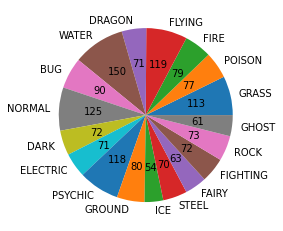

In [5]:
typeCount = {}
for index, row in df.iterrows():
    for i in row["Type(s)"].split("/"): #Split this entry by / for possible 2 entries
        if i in typeCount:
            typeCount[i] += 1 #If seen before, increase the count by 1
        else:
            typeCount[i] = 1
plt.pie(list(typeCount.values()),labels = list(typeCount.keys()), autopct=lambda p: '{:.0f}'.format(p * sum(list(typeCount.values())) / 100));

### 1. Let's do a high level analysis and first see what the average value for the total stat value
While this may not be as valuable as examining other stats, we are interested in getting a general idea of how every pokemon compares to the national average so to speak. There will definitely be some outliar values because some pokemon have abnormably high values across all columns or just for one even.

In [11]:
AverageStats = [df["HP"].mean(), df["Attack"].mean(), df["Defense"].mean(), df["Sp. Atk"].mean(), df["Sp. Def"].mean(), df["Speed"].mean()]
AverageStats

[69.77286135693215,
 80.26548672566372,
 74.42871189773845,
 72.76007866273353,
 72.12782694198623,
 68.38249754178958]

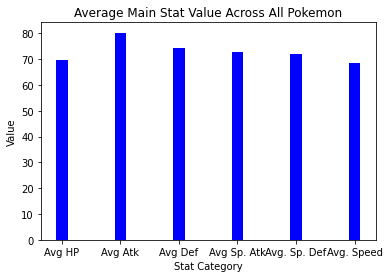

In [7]:
#Graph to visualize this
plt.bar(["Avg HP", "Avg Atk", "Avg Def", "Avg Sp. Atk", "Avg. Sp. Def", "Avg. Speed"], AverageStats, color="blue", width=.2)
plt.title("Average Main Stat Value Across All Pokemon");
plt.xlabel("Stat Category");
plt.ylabel("Value");

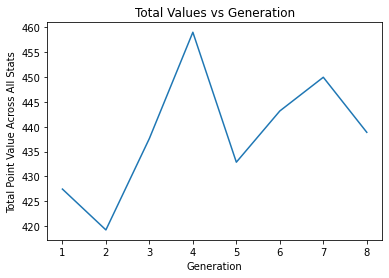

In [155]:
#How have total stats changed over time
g1 = sum([df[df["Generation"] == 1]["HP"].mean(), df[df["Generation"] == 1]["Attack"].mean(), df[df["Generation"] == 1]["Defense"].mean(), 
     df[df["Generation"] == 1]["Sp. Atk"].mean(), df[df["Generation"] == 1]["Sp. Def"].mean(), df[df["Generation"] == 1]["Speed"].mean()])
g2 = sum([df[df["Generation"] == 2]["HP"].mean(), df[df["Generation"] == 2]["Attack"].mean(), df[df["Generation"] == 2]["Defense"].mean(), 
     df[df["Generation"] == 2]["Sp. Atk"].mean(), df[df["Generation"] == 2]["Sp. Def"].mean(), df[df["Generation"] == 2]["Speed"].mean()])
g3 = sum([df[df["Generation"] == 3]["HP"].mean(), df[df["Generation"] == 3]["Attack"].mean(), df[df["Generation"] == 3]["Defense"].mean(), 
     df[df["Generation"] == 3]["Sp. Atk"].mean(), df[df["Generation"] == 3]["Sp. Def"].mean(), df[df["Generation"] == 3]["Speed"].mean()])
g4 = sum([df[df["Generation"] == 4]["HP"].mean(), df[df["Generation"] == 4]["Attack"].mean(), df[df["Generation"] == 4]["Defense"].mean(), 
     df[df["Generation"] == 4]["Sp. Atk"].mean(), df[df["Generation"] == 4]["Sp. Def"].mean(), df[df["Generation"] == 4]["Speed"].mean()])
g5 = sum([df[df["Generation"] == 5]["HP"].mean(), df[df["Generation"] == 5]["Attack"].mean(), df[df["Generation"] == 5]["Defense"].mean(), 
     df[df["Generation"] == 5]["Sp. Atk"].mean(), df[df["Generation"] == 5]["Sp. Def"].mean(), df[df["Generation"] == 5]["Speed"].mean()])
g6 = sum([df[df["Generation"] == 6]["HP"].mean(), df[df["Generation"] == 6]["Attack"].mean(), df[df["Generation"] == 6]["Defense"].mean(), 
     df[df["Generation"] == 6]["Sp. Atk"].mean(), df[df["Generation"] == 6]["Sp. Def"].mean(), df[df["Generation"] == 6]["Speed"].mean()])
g7 = sum([df[df["Generation"] == 7]["HP"].mean(), df[df["Generation"] == 7]["Attack"].mean(), df[df["Generation"] == 7]["Defense"].mean(), 
     df[df["Generation"] == 7]["Sp. Atk"].mean(), df[df["Generation"] == 7]["Sp. Def"].mean(), df[df["Generation"] == 7]["Speed"].mean()])
g8 = sum([df[df["Generation"] == 8]["HP"].mean(), df[df["Generation"] == 8]["Attack"].mean(), df[df["Generation"] == 8]["Defense"].mean(), 
     df[df["Generation"] == 8]["Sp. Atk"].mean(), df[df["Generation"] == 8]["Sp. Def"].mean(), df[df["Generation"] == 8]["Speed"].mean()])
plt.plot([1,2,3,4,5,6,7,8],[g1,g2,g3,g4,g5,g6,g7,g8])
plt.title("Total Values vs Generation")
plt.xlabel("Generation")
plt.ylabel("Total Point Value Across All Stats")
plt.show()

While this value is interesting, let's see how
- every pokemon compares to this "national average" on a total stat basis
- every type compares to this "national average" on a total stat basis
- every generation falls compared to this "national average" on a total stat basis

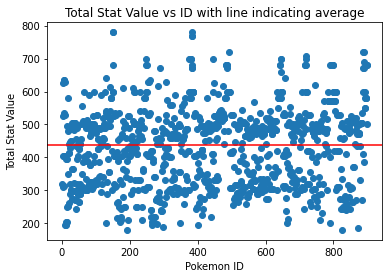

In [8]:
#Scatter plot with X as ID and Y as total value
#Having 5 scatter plots would be annoying, so let's just compare the total column to this previous value
plt.scatter(df["ID"],df["Total Stat Values"])
plt.axhline(sum(AverageStats), color="red") #Red line indicates what the national total stat value is
plt.title("Total Stat Value vs ID with line indicating average")
plt.xlabel("Pokemon ID");
plt.ylabel("Total Stat Value");

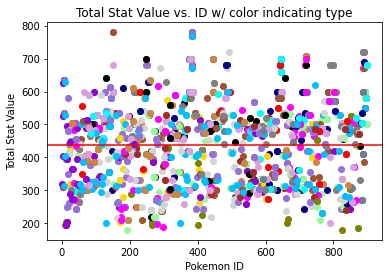

In [12]:
#Scatter plot labeling each point a diff color based upon type
    #df.groupby("Type(s)").get_group("ICE") --> accessing a groupby by column
mainTypes = {"NORMAL": "lightgray", "FIGHTING": "sienna", "FLYING": "mediumpurple", "POISON": "darkviolet", "GROUND": "peru", 
             "ROCK": "brown", "BUG": "olive", "GHOST": "slategray", "STEEL": "grey", "FIRE": "red", "WATER": "deepskyblue", 
             "GRASS": "palegreen", "ELECTRIC": "gold", "PSYCHIC": "plum", "ICE": "cyan", "DRAGON": "navy", "DARK": "black", "FAIRY": "magenta"}
fig, ax = plt.subplots()
plt.axhline(sum(AverageStats), color="red");
for label, obs in df.groupby("Type(s)"):
    for t in label.split("/"): #There can be two types, so we need both
        ax.scatter(obs["ID"],obs["Total Stat Values"], c=mainTypes[t], label=label)
        ax.set_xlabel("Pokemon ID")
        ax.set_ylabel("Total Stat Value")
        plt.title("Total Stat Value vs. ID w/ color indicating type")

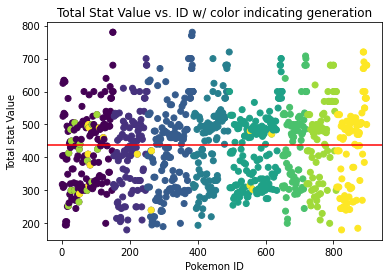

In [10]:
#Scatter plot labeling each point a diff color based upon generation
plt.scatter(df["ID"],df["Total Stat Values"], c=df["Generation"])
plt.axhline(sum(AverageStats), color="red");
plt.title("Total Stat Value vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Total stat Value");

In the first scatterplot, a quick glance seems to suggest that there's an equal amount of pokemon at, below, and above the national average. This would suggest that perhaps every pokemon is designed to be balanced in some way. However, this is very surface level and we need to dig deeper with more analysis. If you look at the type plot, it seems to suggest the same thing. Each different color represents a different type; the x and y axis are still the same, but now we can look at their type as an additional piece of color. We only looked at the main 18 types because 108 different colors would have been overwhelming. Either way, the plot seems to suggest a balance of each type for each distance away from the central value. That said, there seems to be a large aomunt of light green dots below the line compared to other types.

If you look at the generation plot, it looks similar to the first plot. The only difference is that each color represennts a different generation. Because a generation is determined by its ID values, the generation becomes higher(newer) if you move right on the x-axis. As such, that is why the points go from a dark to ligher color scheme. However, this plot seems to suggest the same thing as the first plot on a quick glance: every generation has an equal amount above and below the national average. This would suggest that every generation continues to balance out the national average with higher and lower outliars.

### 2. Let's see if any generation falls short or above the average for each category
There are 5 categories, so for each one let's see how every generation falls compared to the average for each one

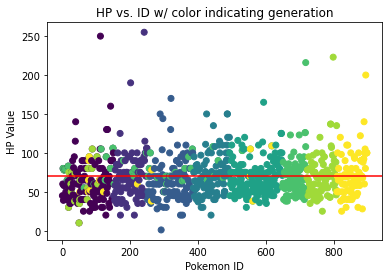

In [15]:
#Keep in mind we used AverageStats above, which is a list of averages
plt.scatter(df["ID"],df["HP"],c=df["Generation"])
plt.axhline(AverageStats[0], color="red");
plt.title("HP vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("HP Value");

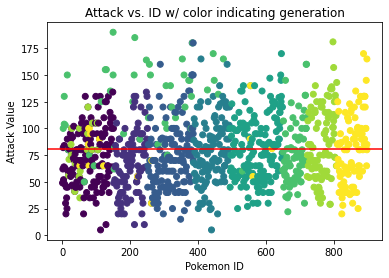

In [16]:
plt.scatter(df["ID"],df["Attack"],c=df["Generation"])
plt.axhline(AverageStats[1], color="red");
plt.title("Attack vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Attack Value");

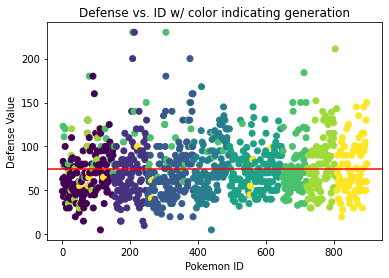

In [17]:
plt.scatter(df["ID"],df["Defense"],c=df["Generation"])
plt.axhline(AverageStats[2], color="red");
plt.title("Defense vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Defense Value");

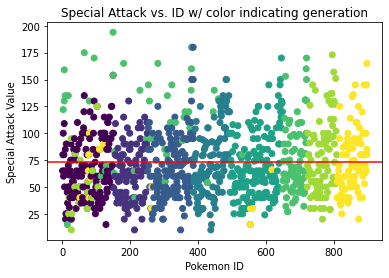

In [18]:
plt.scatter(df["ID"],df["Sp. Atk"],c=df["Generation"])
plt.axhline(AverageStats[3], color="red");
plt.title("Special Attack vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Special Attack Value");

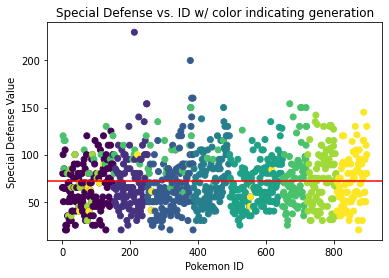

In [19]:
plt.scatter(df["ID"],df["Sp. Def"],c=df["Generation"])
plt.axhline(AverageStats[4], color="red");
plt.title("Special Defense vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Special Defense Value");

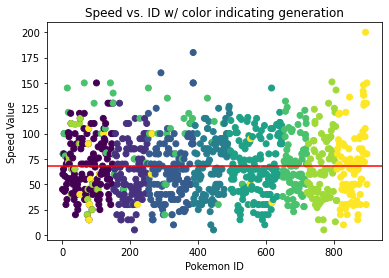

In [20]:
plt.scatter(df["ID"],df["Speed"],c=df["Generation"])
plt.axhline(AverageStats[5], color="red");
plt.title("Speed vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Speed Value");

So what did we learn? For each of the main 6 stats, most of the values tend to cluster around each other and near the average across all generations. Of course, there are extremely high and low outliars for each of the 6 plots. In addition, each one of the plots has a different y range label so that affects how we perceive it too. A significant amount of attack values congregate just below the 75 value on the y axis. The hp plot is interseting because we see that most values are extremely close to their own generation and all values on the entire plot, ranging from 50-100 approximately. Defense was just as tight and clustered as hp was, while the other plots were still clustered and featured some more spread for these points. HP, Defense, and Sp. Defense are the most clustered so feature the least variety it seems. The other 3 plots, again, show a little more spread. This would suggest that HP, Defense, and Special Defense are probably the least likely to change over time.

### 3. Let's see how the average stat for each 6 stat categories has changed over 8 generations
Now we'll be switching things up a little. In the previous section, we only looked at the total stat averages and compared it to each type and generation to see if there are any high level patterns. As indicated, it's a bit difficult to tell if any type or generation has seen changes in strength over time. We will need to do a bit more in depth analysis. In this part, we will be seeing how the stat amount for each category has changed over 8 generations.

In [59]:
#For every generation, let's calculate the mean value
genStatValues = df.groupby("Generation").mean() #For every generation, we compute the average of every column. We don't need all these values, so we can use it later
genStatValues = genStatValues.drop(["ID", "Ph. Sweeper", "Sp. Sweeper", "Ph. Tank", "Sp. Tank", "Wall", "Total Role"], 1)
genStatValues

Total Stat Values         HP     Attack    Defense    Sp. Atk  \
Generation                                                                  
1                  407.967320  64.091503  72.973856  68.117647  67.176471   
2                  406.000000  71.000000  68.183673  69.275510  64.326531   
3                  413.164286  65.821429  75.321429  70.257143  70.257143   
4                  451.931034  72.775862  79.991379  77.215517  75.293103   
5                  432.161491  71.217391  82.490683  71.695652  71.130435   
6                  507.984127  73.650794  94.666667  87.293651  89.579365   
7                  449.955752  69.858407  85.858407  79.238938  73.725664   
8                  438.872727  71.800000  82.254545  74.490909  70.681818   

              Sp. Def      Speed  
Generation                        
1           66.169935  69.437908  
2           71.979592  61.234694  
3           67.807143  63.700000  
4           76.370690  70.284483  
5           67.975155  67.652174  
6           85.007937  77.785714  
7           74.230088  67.044248  
8           70.736364  68.909091

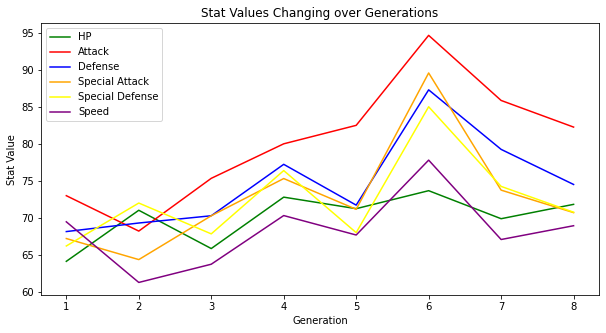

In [60]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4,5,6,7,8], genStatValues["HP"], c = "green", label="HP")
plt.plot([1,2,3,4,5,6,7,8], genStatValues["Attack"], c = "red", label="Attack")
plt.plot([1,2,3,4,5,6,7,8], genStatValues["Defense"], c = "blue", label="Defense")
plt.plot([1,2,3,4,5,6,7,8], genStatValues["Sp. Atk"], c = "orange", label="Special Attack")
plt.plot([1,2,3,4,5,6,7,8], genStatValues["Sp. Def"], c = "yellow", label="Special Defense")
plt.plot([1,2,3,4,5,6,7,8], genStatValues["Speed"], c = "purple", label="Speed")
plt.title("Stat Values Changing over Generations")
plt.xlabel("Generation")
plt.ylabel("Stat Value")
plt.legend()
plt.show()

Each one of those lines represents one of the main 6 stats and can help us see how these categories have changed over time in general.
- HP: This stat category seems to be one of the most stable ones. Like all stat values, it experiences changes over 8 generations. This one has continuously gone up and down, but generally lies somewhere between 65-75 points in this category
- Attack: This value is higher than the other values naturally it seems. It's starting value between 75 and 80 is higher than other categories, and every time it grows it becomes the new peak value on this plot. It did dip unusually low in Generation 2, but otherwise it ranks high
- Defense: This value seems to be mostly stable with the exception of Generation 5 and 8. This stat category saw a huge drop in value from Generation 4 to 5, but it then saw a huge return for the next 2 generations.
- Special Attack: This shape is quite unusual compared to the rest. It also expands and contracts like the other values, but it seems to plateau around generation 3 and 4, which isn't seen in the other values. This one is features This one has a dip from generation 1 to 2 as well, and features a stedious decline from 6 to 8.
- Special Defense: This shape and trend mostly resembles the defense stat, which is fitting because both focus on defense
- Speed: This value is lower than the other values for the most part, but the dip from generation 1 to 2 is very noticable here. From 4 to 8, the values are relatively stable despite declining.

All in all, it seems most values dipped in generation 2 and somewhere between generations 5 and 6. It would seem to suggest that perhaps generation 2 and 5/6 introduced some statistically weaker pokemon. However, it's not fair to lump all pokemon together. In the next section, we will be analyzing what the average stat breakdown is for each of the 18 pokemon types.

### 4. Let's compute average stat values for each of the 18 pokemon types
As mentioned, we'll now compute category averages for each of the 18 types. In other words, we'll see what Fire types have for average HP, Attack, Defense, Special Attack, Special Defense, and Speed. We'll also look at the 17 other types and see how they compare. This will be a little tricky because of dual types and group by making these a separate value. To maintain consistency as before, dual typed pokemon have their stat values count for both of those types.

In [42]:
hpStat, atkStat, defStat, spAtkStat, spDefStat, speedStat = {}, {}, {}, {}, {}, {} #Each type gets 6 dictionaries, where the value will be that average
seenBefore = set() #Have we seen this type yet

for index, row in df.iterrows(): #Iterate over all entries
    for pType in row["Type(s)"].split("/"): #We need to account for 2 types
        if pType in seenBefore: #If we've seen this type before, add this new entry
            hpStat[pType].append(row["HP"])
            atkStat[pType].append(row["Attack"])
            defStat[pType].append(row["Defense"])
            spAtkStat[pType].append(row["Sp. Atk"])
            spDefStat[pType].append(row["Sp. Def"])
            speedStat[pType].append(row["Speed"])
        else: #We haven't seen this before, so initialize the 6 dictionaries
            seenBefore.add(pType)
            hpStat[pType] = [row["HP"]]
            atkStat[pType] = [row["Attack"]]
            defStat[pType] = [row["Defense"]]
            spAtkStat[pType] = [row["Sp. Atk"]]
            spDefStat[pType] = [row["Sp. Def"]]
            speedStat[pType] = [row["Speed"]]
#Identified a unique problem: there's a random NaN value in POISON, FLYING, DARK, PSYCHIC, AND FIGHTING for some reason even though testing shows there's no np.nan anywhere
    #Solution: we're gonna convert each list into a np array and take the nanmean
    #df.loc[df['HP'] == np.nan] shows no nan anywhere
for key in hpStat:
    hpStat[key] = np.nanmean(np.array(hpStat[key]))
    atkStat[key] = np.nanmean(np.array(atkStat[key]))
    defStat[key] = np.nanmean(np.array(defStat[key]))
    spAtkStat[key] = np.nanmean(np.array(spAtkStat[key]))
    spDefStat[key] = np.nanmean(np.array(spDefStat[key]))
    speedStat[key] = np.nanmean(np.array(speedStat[key]))
hpStat #Just to show one

{'GRASS': 66.7433628318584,
 'POISON': 65.07894736842105,
 'FIRE': 69.60759493670886,
 'FLYING': 71.42241379310344,
 'DRAGON': 86.09859154929578,
 'WATER': 69.80666666666667,
 'BUG': 57.05555555555556,
 'NORMAL': 75.672,
 'DARK': 72.59154929577464,
 'ELECTRIC': 64.28169014084507,
 'PSYCHIC': 72.67241379310344,
 'GROUND': 75.225,
 'ICE': 77.61111111111111,
 'STEEL': 69.21428571428571,
 'FAIRY': 67.36507936507937,
 'FIGHTING': 75.29577464788733,
 'ROCK': 68.27397260273973,
 'GHOST': 65.78688524590164}

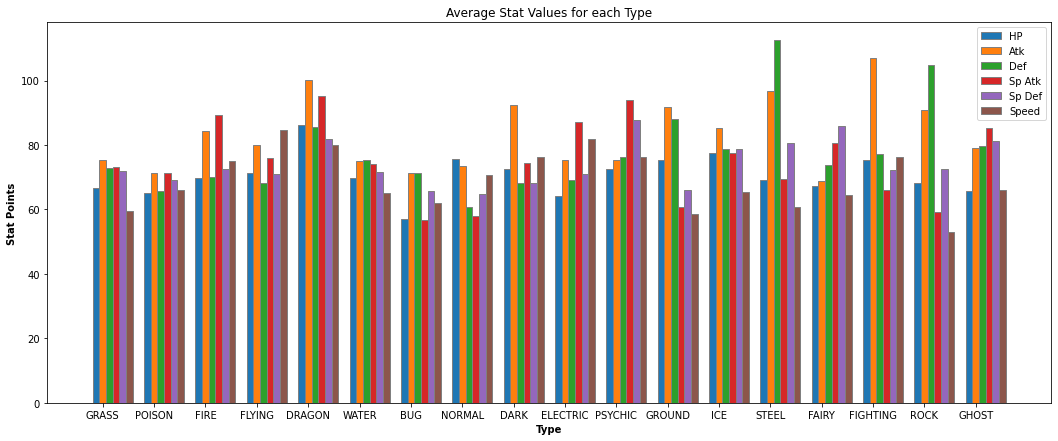

In [43]:
#For each type, we now have average stats. Let's plot these side by side as bar graphs for easy visualiztion
barWidth = 0.13
fig = plt.subplots(figsize =(18, 7)) 

#Determines where each bar goes
b1 = np.arange(18) 
b2 = [x + barWidth for x in b1] 
b3 = [x + barWidth for x in b2]
b4 = [x + barWidth for x in b3] 
b5 = [x + barWidth for x in b4] 
b6 = [x + barWidth for x in b5] 

#Plot the bar
plt.bar(b1, list(hpStat.values()),  width = barWidth, 
        edgecolor ='grey', label ='HP') 
plt.bar(b2, list(atkStat.values()), width = barWidth, 
        edgecolor ='grey', label ='Atk') 
plt.bar(b3, list(defStat.values()), width = barWidth, 
        edgecolor ='grey', label ='Def')
plt.bar(b4, list(spAtkStat.values()), width = barWidth, 
        edgecolor ='grey', label ='Sp Atk')
plt.bar(b5, list(spDefStat.values()), width = barWidth, 
        edgecolor ='grey', label ='Sp Def')
plt.bar(b6, list(speedStat.values()), width = barWidth, 
        edgecolor ='grey', label ='Speed') 

#Label the bars
plt.title("Average Stat Values for each Type")
plt.xlabel('Type', fontweight ='bold') 
plt.ylabel('Stat Points', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(list(hpStat.values())))], 
           ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING",
           "ROCK", "GHOST"]) 
plt.legend()
plt.show() 

This seems overwhelming because each of the 18 types had 6 values to look at. But let's just look for general patterns and trends based upon the distributions for each type. While we could've displayed a plot for each type, I think a multi bar graph really helps focus on comparing each graph to each other and amongst itself. From a high level glance, every type seems to generally have the same range for all 6 categories. That, however, doesn't mean that some values aren't higher or lower than other categories for that type. For example, if you look at Grass on the very left, all the values are generally the same but its health and speed are lower than its rest. We can thus make a general statement based upon this bar graph that every type has many categorial values in the same range but some are higher or lower for each type.

However, there are some interesting patterns that I will comment on specifically (we can pay extra attention on these large values over time in the next section)
- Dragon is unique in the fact that all 6 stat categories are higher than the majority of other competing types
- Steel and Rock have huge defense values to the point that they eclipse values in all other categories in terms of numerical value
- Fighting (befitting its name) has an extradinarily high attack value, but steel, ground, and dark are close behind also
- No pokemon seems to pale behind overall compared to the other competing types. The same cannot be said for specific stats
- If we were to look at this graph only, it would seem to suggest that Dragon, Ghost, Electric, Ice, and Fairy are well balanced and higher performers

### 5. Let's see how the 18 type averages have changed over 8 generations
Let's take what we did in the previous step and go a bit deeper. For each type, let's see how the average stat has changed over time. However, we need to keep in mind that not all 18 types were introduced right away. As such, not all types will have values from the beginning.

In [61]:
from collections import defaultdict #defaultdict helps remove redundancies
import warnings
warnings.filterwarnings('ignore') #Some values will be empty and generate warnings

hpStat1, atkStat1, defStat1, spAtkStat1, spDefStat1, speedStat1 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
hpStat2, atkStat2, defStat2, spAtkStat2, spDefStat2, speedStat2 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
hpStat3, atkStat3, defStat3, spAtkStat3, spDefStat3, speedStat3 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
hpStat4, atkStat4, defStat4, spAtkStat4, spDefStat4, speedStat4 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
hpStat5, atkStat5, defStat5, spAtkStat5, spDefStat5, speedStat5 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
hpStat6, atkStat6, defStat6, spAtkStat6, spDefStat6, speedStat6 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
hpStat7, atkStat7, defStat7, spAtkStat7, spDefStat7, speedStat7 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
hpStat8, atkStat8, defStat8, spAtkStat8, spDefStat8, speedStat8 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

for index, row in df.iterrows(): #This looks really messy, but we're doing the same thing as before but placing by generation into structs
    for pType in row["Type(s)"].split("/"): #For every type
        if row["Generation"] == 1: #What gen is this row in?
            hpStat1[pType].append(row["HP"])
            atkStat1[pType].append(row["Attack"])
            defStat1[pType].append(row["Defense"])
            spAtkStat1[pType].append(row["Sp. Atk"])
            spDefStat1[pType].append(row["Sp. Def"])
            speedStat1[pType].append(row["Speed"])
        elif row["Generation"] == 2:
            hpStat2[pType].append(row["HP"])
            atkStat2[pType].append(row["Attack"])
            defStat2[pType].append(row["Defense"])
            spAtkStat2[pType].append(row["Sp. Atk"])
            spDefStat2[pType].append(row["Sp. Def"])
            speedStat2[pType].append(row["Speed"])
        elif row["Generation"] == 3:
            hpStat3[pType].append(row["HP"])
            atkStat3[pType].append(row["Attack"])
            defStat3[pType].append(row["Defense"])
            spAtkStat3[pType].append(row["Sp. Atk"])
            spDefStat3[pType].append(row["Sp. Def"])
            speedStat3[pType].append(row["Speed"])
        elif row["Generation"] == 4:
            hpStat4[pType].append(row["HP"])
            atkStat4[pType].append(row["Attack"])
            defStat4[pType].append(row["Defense"])
            spAtkStat4[pType].append(row["Sp. Atk"])
            spDefStat4[pType].append(row["Sp. Def"])
            speedStat4[pType].append(row["Speed"])
        elif row["Generation"] == 5:
            hpStat5[pType].append(row["HP"])
            atkStat5[pType].append(row["Attack"])
            defStat5[pType].append(row["Defense"])
            spAtkStat5[pType].append(row["Sp. Atk"])
            spDefStat5[pType].append(row["Sp. Def"])
            speedStat5[pType].append(row["Speed"])
        elif row["Generation"] == 6:
            hpStat6[pType].append(row["HP"])
            atkStat6[pType].append(row["Attack"])
            defStat6[pType].append(row["Defense"])
            spAtkStat6[pType].append(row["Sp. Atk"])
            spDefStat6[pType].append(row["Sp. Def"])
            speedStat6[pType].append(row["Speed"])
        elif row["Generation"] == 7:
            hpStat7[pType].append(row["HP"])
            atkStat7[pType].append(row["Attack"])
            defStat7[pType].append(row["Defense"])
            spAtkStat7[pType].append(row["Sp. Atk"])
            spDefStat7[pType].append(row["Sp. Def"])
            speedStat7[pType].append(row["Speed"])
        elif row["Generation"] == 8:
            hpStat8[pType].append(row["HP"])
            atkStat8[pType].append(row["Attack"])
            defStat8[pType].append(row["Defense"])
            spAtkStat8[pType].append(row["Sp. Atk"])
            spDefStat8[pType].append(row["Sp. Def"])
            speedStat8[pType].append(row["Speed"])              
#Because some types don't appear in every generation, we're expecting some NaN. Let's take the np.nanmean to remove these values
for key in hpStat:
    hpStat1[key] = np.nanmean(np.array(hpStat1[key]))
    atkStat1[key] = np.nanmean(np.array(atkStat1[key]))
    defStat1[key] = np.nanmean(np.array(defStat1[key]))
    spAtkStat1[key] = np.nanmean(np.array(spAtkStat1[key]))
    spDefStat1[key] = np.nanmean(np.array(spDefStat1[key]))
    speedStat1[key] = np.nanmean(np.array(speedStat1[key]))
    
    hpStat2[key] = np.nanmean(np.array(hpStat2[key]))
    atkStat2[key] = np.nanmean(np.array(atkStat2[key]))
    defStat2[key] = np.nanmean(np.array(defStat2[key]))
    spAtkStat2[key] = np.nanmean(np.array(spAtkStat2[key]))
    spDefStat2[key] = np.nanmean(np.array(spDefStat2[key]))
    speedStat2[key] = np.nanmean(np.array(speedStat2[key]))
    
    hpStat3[key] = np.nanmean(np.array(hpStat3[key]))
    atkStat3[key] = np.nanmean(np.array(atkStat3[key]))
    defStat3[key] = np.nanmean(np.array(defStat3[key]))
    spAtkStat3[key] = np.nanmean(np.array(spAtkStat3[key]))
    spDefStat3[key] = np.nanmean(np.array(spDefStat3[key]))
    speedStat3[key] = np.nanmean(np.array(speedStat3[key]))
    
    hpStat4[key] = np.nanmean(np.array(hpStat4[key]))
    atkStat4[key] = np.nanmean(np.array(atkStat4[key]))
    defStat4[key] = np.nanmean(np.array(defStat4[key]))
    spAtkStat4[key] = np.nanmean(np.array(spAtkStat4[key]))
    spDefStat4[key] = np.nanmean(np.array(spDefStat4[key]))
    speedStat4[key] = np.nanmean(np.array(speedStat4[key]))
    
    hpStat5[key] = np.nanmean(np.array(hpStat5[key]))
    atkStat5[key] = np.nanmean(np.array(atkStat5[key]))
    defStat5[key] = np.nanmean(np.array(defStat5[key]))
    spAtkStat5[key] = np.nanmean(np.array(spAtkStat5[key]))
    spDefStat5[key] = np.nanmean(np.array(spDefStat5[key]))
    speedStat5[key] = np.nanmean(np.array(speedStat5[key]))
    
    hpStat6[key] = np.nanmean(np.array(hpStat6[key]))
    atkStat6[key] = np.nanmean(np.array(atkStat6[key]))
    defStat6[key] = np.nanmean(np.array(defStat6[key]))
    spAtkStat6[key] = np.nanmean(np.array(spAtkStat6[key]))
    spDefStat6[key] = np.nanmean(np.array(spDefStat6[key]))
    speedStat6[key] = np.nanmean(np.array(speedStat6[key]))
    
    hpStat7[key] = np.nanmean(np.array(hpStat7[key]))
    atkStat7[key] = np.nanmean(np.array(atkStat7[key]))
    defStat7[key] = np.nanmean(np.array(defStat7[key]))
    spAtkStat7[key] = np.nanmean(np.array(spAtkStat7[key]))
    spDefStat7[key] = np.nanmean(np.array(spDefStat7[key]))
    speedStat7[key] = np.nanmean(np.array(speedStat7[key]))
    
    hpStat8[key] = np.nanmean(np.array(hpStat8[key]))
    atkStat8[key] = np.nanmean(np.array(atkStat8[key]))
    defStat8[key] = np.nanmean(np.array(defStat8[key]))
    spAtkStat8[key] = np.nanmean(np.array(spAtkStat8[key]))
    spDefStat8[key] = np.nanmean(np.array(spDefStat8[key]))
    speedStat8[key] = np.nanmean(np.array(speedStat8[key]))

#Let's try putting that into a dataframe for ease of viewing--> we don't NEED to do this but could be easier for plotting later
hpChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [hpStat1["GRASS"], hpStat1["POISON"], hpStat1["FIRE"],hpStat1["FLYING"],hpStat1["DRAGON"],hpStat1["WATER"],hpStat1["BUG"],hpStat1["NORMAL"],hpStat1["DARK"],hpStat1["ELECTRIC"],hpStat1["PSYCHIC"],hpStat1["GROUND"],hpStat1["ICE"],hpStat1["STEEL"],hpStat1["FAIRY"],hpStat1["FIGHTING"],hpStat1["ROCK"],hpStat1["GHOST"]],
       'G2': [hpStat2["GRASS"], hpStat2["POISON"], hpStat2["FIRE"],hpStat2["FLYING"],hpStat2["DRAGON"],hpStat2["WATER"],hpStat2["BUG"],hpStat2["NORMAL"],hpStat2["DARK"],hpStat2["ELECTRIC"],hpStat2["PSYCHIC"],hpStat2["GROUND"],hpStat2["ICE"],hpStat2["STEEL"],hpStat2["FAIRY"],hpStat2["FIGHTING"],hpStat2["ROCK"],hpStat2["GHOST"]],
       'G3': [hpStat3["GRASS"], hpStat3["POISON"], hpStat3["FIRE"],hpStat3["FLYING"],hpStat3["DRAGON"],hpStat3["WATER"],hpStat3["BUG"],hpStat3["NORMAL"],hpStat3["DARK"],hpStat3["ELECTRIC"],hpStat3["PSYCHIC"],hpStat3["GROUND"],hpStat3["ICE"],hpStat3["STEEL"],hpStat3["FAIRY"],hpStat3["FIGHTING"],hpStat3["ROCK"],hpStat3["GHOST"]],
       'G4': [hpStat4["GRASS"], hpStat4["POISON"], hpStat4["FIRE"],hpStat4["FLYING"],hpStat4["DRAGON"],hpStat4["WATER"],hpStat4["BUG"],hpStat4["NORMAL"],hpStat4["DARK"],hpStat4["ELECTRIC"],hpStat4["PSYCHIC"],hpStat4["GROUND"],hpStat4["ICE"],hpStat4["STEEL"],hpStat4["FAIRY"],hpStat4["FIGHTING"],hpStat3["ROCK"],hpStat4["GHOST"]],
       'G5': [hpStat5["GRASS"], hpStat5["POISON"], hpStat5["FIRE"],hpStat5["FLYING"],hpStat5["DRAGON"],hpStat5["WATER"],hpStat5["BUG"],hpStat5["NORMAL"],hpStat5["DARK"],hpStat5["ELECTRIC"],hpStat5["PSYCHIC"],hpStat5["GROUND"],hpStat5["ICE"],hpStat5["STEEL"],hpStat5["FAIRY"],hpStat5["FIGHTING"],hpStat4["ROCK"],hpStat5["GHOST"]],
       'G6': [hpStat6["GRASS"], hpStat6["POISON"], hpStat6["FIRE"],hpStat6["FLYING"],hpStat6["DRAGON"],hpStat6["WATER"],hpStat6["BUG"],hpStat6["NORMAL"],hpStat6["DARK"],hpStat6["ELECTRIC"],hpStat6["PSYCHIC"],hpStat6["GROUND"],hpStat6["ICE"],hpStat6["STEEL"],hpStat6["FAIRY"],hpStat6["FIGHTING"],hpStat5["ROCK"],hpStat6["GHOST"]],
       'G7': [hpStat7["GRASS"], hpStat7["POISON"], hpStat7["FIRE"],hpStat7["FLYING"],hpStat7["DRAGON"],hpStat7["WATER"],hpStat7["BUG"],hpStat7["NORMAL"],hpStat7["DARK"],hpStat7["ELECTRIC"],hpStat7["PSYCHIC"],hpStat7["GROUND"],hpStat7["ICE"],hpStat7["STEEL"],hpStat7["FAIRY"],hpStat7["FIGHTING"],hpStat6["ROCK"],hpStat7["GHOST"]],
       'G8': [hpStat8["GRASS"], hpStat8["POISON"], hpStat8["FIRE"],hpStat8["FLYING"],hpStat8["DRAGON"],hpStat8["WATER"],hpStat8["BUG"],hpStat8["NORMAL"],hpStat8["DARK"],hpStat8["ELECTRIC"],hpStat8["PSYCHIC"],hpStat8["GROUND"],hpStat8["ICE"],hpStat8["STEEL"],hpStat8["FAIRY"],hpStat8["FIGHTING"],hpStat7["ROCK"],hpStat8["GHOST"]]}
hpChange = pd.DataFrame(hpChange)
atkChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [atkStat1["GRASS"], atkStat1["POISON"], atkStat1["FIRE"],atkStat1["FLYING"],atkStat1["DRAGON"],atkStat1["WATER"],atkStat1["BUG"],atkStat1["NORMAL"],atkStat1["DARK"],atkStat1["ELECTRIC"],atkStat1["PSYCHIC"],atkStat1["GROUND"],atkStat1["ICE"],atkStat1["STEEL"],atkStat1["FAIRY"],atkStat1["FIGHTING"],atkStat1["ROCK"],atkStat1["GHOST"]],
       'G2': [atkStat2["GRASS"], atkStat2["POISON"], atkStat2["FIRE"],atkStat2["FLYING"],atkStat2["DRAGON"],atkStat2["WATER"],atkStat2["BUG"],atkStat2["NORMAL"],atkStat2["DARK"],atkStat2["ELECTRIC"],atkStat2["PSYCHIC"],atkStat2["GROUND"],atkStat2["ICE"],atkStat2["STEEL"],atkStat2["FAIRY"],atkStat2["FIGHTING"],atkStat2["ROCK"],atkStat2["GHOST"]],
       'G3': [atkStat3["GRASS"], atkStat3["POISON"], atkStat3["FIRE"],atkStat3["FLYING"],atkStat3["DRAGON"],atkStat3["WATER"],atkStat3["BUG"],atkStat3["NORMAL"],atkStat3["DARK"],atkStat3["ELECTRIC"],atkStat3["PSYCHIC"],atkStat3["GROUND"],atkStat3["ICE"],atkStat3["STEEL"],atkStat3["FAIRY"],atkStat3["FIGHTING"],atkStat3["ROCK"],atkStat3["GHOST"]],
       'G4': [atkStat4["GRASS"], atkStat4["POISON"], atkStat4["FIRE"],atkStat4["FLYING"],atkStat4["DRAGON"],atkStat4["WATER"],atkStat4["BUG"],atkStat4["NORMAL"],atkStat4["DARK"],atkStat4["ELECTRIC"],atkStat4["PSYCHIC"],atkStat4["GROUND"],atkStat4["ICE"],atkStat4["STEEL"],atkStat4["FAIRY"],atkStat4["FIGHTING"],atkStat3["ROCK"],atkStat4["GHOST"]],
       'G5': [atkStat5["GRASS"], atkStat5["POISON"], atkStat5["FIRE"],atkStat5["FLYING"],atkStat5["DRAGON"],atkStat5["WATER"],atkStat5["BUG"],atkStat5["NORMAL"],atkStat5["DARK"],atkStat5["ELECTRIC"],atkStat5["PSYCHIC"],atkStat5["GROUND"],atkStat5["ICE"],atkStat5["STEEL"],atkStat5["FAIRY"],atkStat5["FIGHTING"],atkStat4["ROCK"],atkStat5["GHOST"]],
       'G6': [atkStat6["GRASS"], atkStat6["POISON"], atkStat6["FIRE"],atkStat6["FLYING"],atkStat6["DRAGON"],atkStat6["WATER"],atkStat6["BUG"],atkStat6["NORMAL"],atkStat6["DARK"],atkStat6["ELECTRIC"],atkStat6["PSYCHIC"],atkStat6["GROUND"],atkStat6["ICE"],atkStat6["STEEL"],atkStat6["FAIRY"],atkStat6["FIGHTING"],atkStat5["ROCK"],atkStat6["GHOST"]],
       'G7': [atkStat7["GRASS"], atkStat7["POISON"], atkStat7["FIRE"],atkStat7["FLYING"],atkStat7["DRAGON"],atkStat7["WATER"],atkStat7["BUG"],atkStat7["NORMAL"],atkStat7["DARK"],atkStat7["ELECTRIC"],atkStat7["PSYCHIC"],atkStat7["GROUND"],atkStat7["ICE"],atkStat7["STEEL"],atkStat7["FAIRY"],atkStat7["FIGHTING"],atkStat6["ROCK"],atkStat7["GHOST"]],
       'G8': [atkStat8["GRASS"], atkStat8["POISON"], atkStat8["FIRE"],atkStat8["FLYING"],atkStat8["DRAGON"],atkStat8["WATER"],atkStat8["BUG"],atkStat8["NORMAL"],atkStat8["DARK"],atkStat8["ELECTRIC"],atkStat8["PSYCHIC"],atkStat8["GROUND"],atkStat8["ICE"],atkStat8["STEEL"],atkStat8["FAIRY"],atkStat8["FIGHTING"],atkStat7["ROCK"],atkStat8["GHOST"]]}
atkChange = pd.DataFrame(atkChange)
defChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [defStat1["GRASS"], defStat1["POISON"], defStat1["FIRE"],defStat1["FLYING"],defStat1["DRAGON"],defStat1["WATER"],defStat1["BUG"],defStat1["NORMAL"],defStat1["DARK"],defStat1["ELECTRIC"],defStat1["PSYCHIC"],defStat1["GROUND"],defStat1["ICE"],defStat1["STEEL"],defStat1["FAIRY"],defStat1["FIGHTING"],defStat1["ROCK"],defStat1["GHOST"]],
       'G2': [defStat2["GRASS"], defStat2["POISON"], defStat2["FIRE"],defStat2["FLYING"],defStat2["DRAGON"],defStat2["WATER"],defStat2["BUG"],defStat2["NORMAL"],defStat2["DARK"],defStat2["ELECTRIC"],defStat2["PSYCHIC"],defStat2["GROUND"],defStat2["ICE"],defStat2["STEEL"],defStat2["FAIRY"],defStat2["FIGHTING"],defStat2["ROCK"],defStat2["GHOST"]],
       'G3': [defStat3["GRASS"], defStat3["POISON"], defStat3["FIRE"],defStat3["FLYING"],defStat3["DRAGON"],defStat3["WATER"],defStat3["BUG"],defStat3["NORMAL"],defStat3["DARK"],defStat3["ELECTRIC"],defStat3["PSYCHIC"],defStat3["GROUND"],defStat3["ICE"],defStat3["STEEL"],defStat3["FAIRY"],defStat3["FIGHTING"],defStat3["ROCK"],defStat3["GHOST"]],
       'G4': [defStat4["GRASS"], defStat4["POISON"], defStat4["FIRE"],defStat4["FLYING"],defStat4["DRAGON"],defStat4["WATER"],defStat4["BUG"],defStat4["NORMAL"],defStat4["DARK"],defStat4["ELECTRIC"],defStat4["PSYCHIC"],defStat4["GROUND"],defStat4["ICE"],defStat4["STEEL"],defStat4["FAIRY"],defStat4["FIGHTING"],defStat3["ROCK"],defStat4["GHOST"]],
       'G5': [defStat5["GRASS"], defStat5["POISON"], defStat5["FIRE"],defStat5["FLYING"],defStat5["DRAGON"],defStat5["WATER"],defStat5["BUG"],defStat5["NORMAL"],defStat5["DARK"],defStat5["ELECTRIC"],defStat5["PSYCHIC"],defStat5["GROUND"],defStat5["ICE"],defStat5["STEEL"],defStat5["FAIRY"],defStat5["FIGHTING"],defStat4["ROCK"],defStat5["GHOST"]],
       'G6': [defStat6["GRASS"], defStat6["POISON"], defStat6["FIRE"],defStat6["FLYING"],defStat6["DRAGON"],defStat6["WATER"],defStat6["BUG"],defStat6["NORMAL"],defStat6["DARK"],defStat6["ELECTRIC"],defStat6["PSYCHIC"],defStat6["GROUND"],defStat6["ICE"],defStat6["STEEL"],defStat6["FAIRY"],defStat6["FIGHTING"],defStat5["ROCK"],defStat6["GHOST"]],
       'G7': [defStat7["GRASS"], defStat7["POISON"], defStat7["FIRE"],defStat7["FLYING"],defStat7["DRAGON"],defStat7["WATER"],defStat7["BUG"],defStat7["NORMAL"],defStat7["DARK"],defStat7["ELECTRIC"],defStat7["PSYCHIC"],defStat7["GROUND"],defStat7["ICE"],defStat7["STEEL"],defStat7["FAIRY"],defStat7["FIGHTING"],defStat6["ROCK"],defStat7["GHOST"]],
       'G8': [defStat8["GRASS"], defStat8["POISON"], defStat8["FIRE"],defStat8["FLYING"],defStat8["DRAGON"],defStat8["WATER"],defStat8["BUG"],defStat8["NORMAL"],defStat8["DARK"],defStat8["ELECTRIC"],defStat8["PSYCHIC"],defStat8["GROUND"],defStat8["ICE"],defStat8["STEEL"],defStat8["FAIRY"],defStat8["FIGHTING"],defStat7["ROCK"],defStat8["GHOST"]]}
defChange = pd.DataFrame(defChange)
spAtkChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [spAtkStat1["GRASS"], spAtkStat1["POISON"], spAtkStat1["FIRE"],spAtkStat1["FLYING"],spAtkStat1["DRAGON"],spAtkStat1["WATER"],spAtkStat1["BUG"],spAtkStat1["NORMAL"],spAtkStat1["DARK"],spAtkStat1["ELECTRIC"],spAtkStat1["PSYCHIC"],spAtkStat1["GROUND"],spAtkStat1["ICE"],spAtkStat1["STEEL"],spAtkStat1["FAIRY"],spAtkStat1["FIGHTING"],spAtkStat1["ROCK"],spAtkStat1["GHOST"]],
       'G2': [spAtkStat2["GRASS"], spAtkStat2["POISON"], spAtkStat2["FIRE"],spAtkStat2["FLYING"],spAtkStat2["DRAGON"],spAtkStat2["WATER"],spAtkStat2["BUG"],spAtkStat2["NORMAL"],spAtkStat2["DARK"],spAtkStat2["ELECTRIC"],spAtkStat2["PSYCHIC"],spAtkStat2["GROUND"],spAtkStat2["ICE"],spAtkStat2["STEEL"],spAtkStat2["FAIRY"],spAtkStat2["FIGHTING"],spAtkStat2["ROCK"],spAtkStat2["GHOST"]],
       'G3': [spAtkStat3["GRASS"], spAtkStat3["POISON"], spAtkStat3["FIRE"],spAtkStat3["FLYING"],spAtkStat3["DRAGON"],spAtkStat3["WATER"],spAtkStat3["BUG"],spAtkStat3["NORMAL"],spAtkStat3["DARK"],spAtkStat3["ELECTRIC"],spAtkStat3["PSYCHIC"],spAtkStat3["GROUND"],spAtkStat3["ICE"],spAtkStat3["STEEL"],spAtkStat3["FAIRY"],spAtkStat3["FIGHTING"],spAtkStat3["ROCK"],spAtkStat3["GHOST"]],
       'G4': [spAtkStat4["GRASS"], spAtkStat4["POISON"], spAtkStat4["FIRE"],spAtkStat4["FLYING"],spAtkStat4["DRAGON"],spAtkStat4["WATER"],spAtkStat4["BUG"],spAtkStat4["NORMAL"],spAtkStat4["DARK"],spAtkStat4["ELECTRIC"],spAtkStat4["PSYCHIC"],spAtkStat4["GROUND"],spAtkStat4["ICE"],spAtkStat4["STEEL"],spAtkStat4["FAIRY"],spAtkStat4["FIGHTING"],spAtkStat3["ROCK"],spAtkStat4["GHOST"]],
       'G5': [spAtkStat5["GRASS"], spAtkStat5["POISON"], spAtkStat5["FIRE"],spAtkStat5["FLYING"],spAtkStat5["DRAGON"],spAtkStat5["WATER"],spAtkStat5["BUG"],spAtkStat5["NORMAL"],spAtkStat5["DARK"],spAtkStat5["ELECTRIC"],spAtkStat5["PSYCHIC"],spAtkStat5["GROUND"],spAtkStat5["ICE"],spAtkStat5["STEEL"],spAtkStat5["FAIRY"],spAtkStat5["FIGHTING"],spAtkStat4["ROCK"],spAtkStat5["GHOST"]],
       'G6': [spAtkStat6["GRASS"], spAtkStat6["POISON"], spAtkStat6["FIRE"],spAtkStat6["FLYING"],spAtkStat6["DRAGON"],spAtkStat6["WATER"],spAtkStat6["BUG"],spAtkStat6["NORMAL"],spAtkStat6["DARK"],spAtkStat6["ELECTRIC"],spAtkStat6["PSYCHIC"],spAtkStat6["GROUND"],spAtkStat6["ICE"],spAtkStat6["STEEL"],spAtkStat6["FAIRY"],spAtkStat6["FIGHTING"],spAtkStat5["ROCK"],spAtkStat6["GHOST"]],
       'G7': [spAtkStat7["GRASS"], spAtkStat7["POISON"], spAtkStat7["FIRE"],spAtkStat7["FLYING"],spAtkStat7["DRAGON"],spAtkStat7["WATER"],spAtkStat7["BUG"],spAtkStat7["NORMAL"],spAtkStat7["DARK"],spAtkStat7["ELECTRIC"],spAtkStat7["PSYCHIC"],spAtkStat7["GROUND"],spAtkStat7["ICE"],spAtkStat7["STEEL"],spAtkStat7["FAIRY"],spAtkStat7["FIGHTING"],spAtkStat6["ROCK"],spAtkStat7["GHOST"]],
       'G8': [spAtkStat8["GRASS"], spAtkStat8["POISON"], spAtkStat8["FIRE"],spAtkStat8["FLYING"],spAtkStat8["DRAGON"],spAtkStat8["WATER"],spAtkStat8["BUG"],spAtkStat8["NORMAL"],spAtkStat8["DARK"],spAtkStat8["ELECTRIC"],spAtkStat8["PSYCHIC"],spAtkStat8["GROUND"],spAtkStat8["ICE"],spAtkStat8["STEEL"],spAtkStat8["FAIRY"],spAtkStat8["FIGHTING"],spAtkStat7["ROCK"],spAtkStat8["GHOST"]]}
spAtkChange = pd.DataFrame(spAtkChange)
spDefChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [spDefStat1["GRASS"], spDefStat1["POISON"], spDefStat1["FIRE"],spDefStat1["FLYING"],spDefStat1["DRAGON"],spDefStat1["WATER"],spDefStat1["BUG"],spDefStat1["NORMAL"],spDefStat1["DARK"],spDefStat1["ELECTRIC"],spDefStat1["PSYCHIC"],spDefStat1["GROUND"],spDefStat1["ICE"],spDefStat1["STEEL"],spDefStat1["FAIRY"],spDefStat1["FIGHTING"],spDefStat1["ROCK"],spDefStat1["GHOST"]],
       'G2': [spDefStat2["GRASS"], spDefStat2["POISON"], spDefStat2["FIRE"],spDefStat2["FLYING"],spDefStat2["DRAGON"],spDefStat2["WATER"],spDefStat2["BUG"],spDefStat2["NORMAL"],spDefStat2["DARK"],spDefStat2["ELECTRIC"],spDefStat2["PSYCHIC"],spDefStat2["GROUND"],spDefStat2["ICE"],spDefStat2["STEEL"],spDefStat2["FAIRY"],spDefStat2["FIGHTING"],spDefStat2["ROCK"],spDefStat2["GHOST"]],
       'G3': [spDefStat3["GRASS"], spDefStat3["POISON"], spDefStat3["FIRE"],spDefStat3["FLYING"],spDefStat3["DRAGON"],spDefStat3["WATER"],spDefStat3["BUG"],spDefStat3["NORMAL"],spDefStat3["DARK"],spDefStat3["ELECTRIC"],spDefStat3["PSYCHIC"],spDefStat3["GROUND"],spDefStat3["ICE"],spDefStat3["STEEL"],spDefStat3["FAIRY"],spDefStat3["FIGHTING"],spDefStat3["ROCK"],spDefStat3["GHOST"]],
       'G4': [spDefStat4["GRASS"], spDefStat4["POISON"], spDefStat4["FIRE"],spDefStat4["FLYING"],spDefStat4["DRAGON"],spDefStat4["WATER"],spDefStat4["BUG"],spDefStat4["NORMAL"],spDefStat4["DARK"],spDefStat4["ELECTRIC"],spDefStat4["PSYCHIC"],spDefStat4["GROUND"],spDefStat4["ICE"],spDefStat4["STEEL"],spDefStat4["FAIRY"],spDefStat4["FIGHTING"],spDefStat3["ROCK"],spDefStat4["GHOST"]],
       'G5': [spDefStat5["GRASS"], spDefStat5["POISON"], spDefStat5["FIRE"],spDefStat5["FLYING"],spDefStat5["DRAGON"],spDefStat5["WATER"],spDefStat5["BUG"],spDefStat5["NORMAL"],spDefStat5["DARK"],spDefStat5["ELECTRIC"],spDefStat5["PSYCHIC"],spDefStat5["GROUND"],spDefStat5["ICE"],spDefStat5["STEEL"],spDefStat5["FAIRY"],spDefStat5["FIGHTING"],spDefStat4["ROCK"],spDefStat5["GHOST"]],
       'G6': [spDefStat6["GRASS"], spDefStat6["POISON"], spDefStat6["FIRE"],spDefStat6["FLYING"],spDefStat6["DRAGON"],spDefStat6["WATER"],spDefStat6["BUG"],spDefStat6["NORMAL"],spDefStat6["DARK"],spDefStat6["ELECTRIC"],spDefStat6["PSYCHIC"],spDefStat6["GROUND"],spDefStat6["ICE"],spDefStat6["STEEL"],spDefStat6["FAIRY"],spDefStat6["FIGHTING"],spDefStat5["ROCK"],spDefStat6["GHOST"]],
       'G7': [spDefStat7["GRASS"], spDefStat7["POISON"], spDefStat7["FIRE"],spDefStat7["FLYING"],spDefStat7["DRAGON"],spDefStat7["WATER"],spDefStat7["BUG"],spDefStat7["NORMAL"],spDefStat7["DARK"],spDefStat7["ELECTRIC"],spDefStat7["PSYCHIC"],spDefStat7["GROUND"],spDefStat7["ICE"],spDefStat7["STEEL"],spDefStat7["FAIRY"],spDefStat7["FIGHTING"],spDefStat6["ROCK"],spDefStat7["GHOST"]],
       'G8': [spDefStat8["GRASS"], spDefStat8["POISON"], spDefStat8["FIRE"],spDefStat8["FLYING"],spDefStat8["DRAGON"],spDefStat8["WATER"],spDefStat8["BUG"],spDefStat8["NORMAL"],spDefStat8["DARK"],spDefStat8["ELECTRIC"],spDefStat8["PSYCHIC"],spDefStat8["GROUND"],spDefStat8["ICE"],spDefStat8["STEEL"],spDefStat8["FAIRY"],spDefStat8["FIGHTING"],spDefStat7["ROCK"],spDefStat8["GHOST"]]}
spDefChange = pd.DataFrame(spDefChange)
speedChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [speedStat1["GRASS"], speedStat1["POISON"], speedStat1["FIRE"],speedStat1["FLYING"],speedStat1["DRAGON"],speedStat1["WATER"],speedStat1["BUG"],speedStat1["NORMAL"],speedStat1["DARK"],speedStat1["ELECTRIC"],speedStat1["PSYCHIC"],speedStat1["GROUND"],speedStat1["ICE"],speedStat1["STEEL"],speedStat1["FAIRY"],speedStat1["FIGHTING"],speedStat1["ROCK"],speedStat1["GHOST"]],
       'G2': [speedStat2["GRASS"], speedStat2["POISON"], speedStat2["FIRE"],speedStat2["FLYING"],speedStat2["DRAGON"],speedStat2["WATER"],speedStat2["BUG"],speedStat2["NORMAL"],speedStat2["DARK"],speedStat2["ELECTRIC"],speedStat2["PSYCHIC"],speedStat2["GROUND"],speedStat2["ICE"],speedStat2["STEEL"],speedStat2["FAIRY"],speedStat2["FIGHTING"],speedStat2["ROCK"],speedStat2["GHOST"]],
       'G3': [speedStat3["GRASS"], speedStat3["POISON"], speedStat3["FIRE"],speedStat3["FLYING"],speedStat3["DRAGON"],speedStat3["WATER"],speedStat3["BUG"],speedStat3["NORMAL"],speedStat3["DARK"],speedStat3["ELECTRIC"],speedStat3["PSYCHIC"],speedStat3["GROUND"],speedStat3["ICE"],speedStat3["STEEL"],speedStat3["FAIRY"],speedStat3["FIGHTING"],speedStat3["ROCK"],speedStat3["GHOST"]],
       'G4': [speedStat4["GRASS"], speedStat4["POISON"], speedStat4["FIRE"],speedStat4["FLYING"],speedStat4["DRAGON"],speedStat4["WATER"],speedStat4["BUG"],speedStat4["NORMAL"],speedStat4["DARK"],speedStat4["ELECTRIC"],speedStat4["PSYCHIC"],speedStat4["GROUND"],speedStat4["ICE"],speedStat4["STEEL"],speedStat4["FAIRY"],speedStat4["FIGHTING"],speedStat3["ROCK"],speedStat4["GHOST"]],
       'G5': [speedStat5["GRASS"], speedStat5["POISON"], speedStat5["FIRE"],speedStat5["FLYING"],speedStat5["DRAGON"],speedStat5["WATER"],speedStat5["BUG"],speedStat5["NORMAL"],speedStat5["DARK"],speedStat5["ELECTRIC"],speedStat5["PSYCHIC"],speedStat5["GROUND"],speedStat5["ICE"],speedStat5["STEEL"],speedStat5["FAIRY"],speedStat5["FIGHTING"],speedStat4["ROCK"],speedStat5["GHOST"]],
       'G6': [speedStat6["GRASS"], speedStat6["POISON"], speedStat6["FIRE"],speedStat6["FLYING"],speedStat6["DRAGON"],speedStat6["WATER"],speedStat6["BUG"],speedStat6["NORMAL"],speedStat6["DARK"],speedStat6["ELECTRIC"],speedStat6["PSYCHIC"],speedStat6["GROUND"],speedStat6["ICE"],speedStat6["STEEL"],speedStat6["FAIRY"],speedStat6["FIGHTING"],speedStat5["ROCK"],speedStat6["GHOST"]],
       'G7': [speedStat7["GRASS"], speedStat7["POISON"], speedStat7["FIRE"],speedStat7["FLYING"],speedStat7["DRAGON"],speedStat7["WATER"],speedStat7["BUG"],speedStat7["NORMAL"],speedStat7["DARK"],speedStat7["ELECTRIC"],speedStat7["PSYCHIC"],speedStat7["GROUND"],speedStat7["ICE"],speedStat7["STEEL"],speedStat7["FAIRY"],speedStat7["FIGHTING"],speedStat6["ROCK"],speedStat7["GHOST"]],
       'G8': [speedStat8["GRASS"], speedStat8["POISON"], speedStat8["FIRE"],speedStat8["FLYING"],speedStat8["DRAGON"],speedStat8["WATER"],speedStat8["BUG"],speedStat8["NORMAL"],speedStat8["DARK"],speedStat8["ELECTRIC"],speedStat8["PSYCHIC"],speedStat8["GROUND"],speedStat8["ICE"],speedStat8["STEEL"],speedStat8["FAIRY"],speedStat8["FIGHTING"],speedStat7["ROCK"],speedStat8["GHOST"]]}
speedChange = pd.DataFrame(speedChange)
hpChange #1 of the 8 dataframes. I'm just choosing one arbitraily to display what our end product at this step is

Type         G1         G2         G3          G4         G5  \
0      GRASS  62.500000  61.250000  63.588235   71.187500  65.100000   
1     POISON  60.545455  65.000000  70.600000   63.375000  63.285714   
2       FIRE  63.833333  66.100000  69.285714   66.666667  77.333333   
3     FLYING  68.263158  66.421053  67.500000   75.437500  74.380952   
4     DRAGON  64.333333  75.000000  75.000000  103.428571  88.000000   
5      WATER  62.562500  78.055556  72.206897   72.666667  78.000000   
6        BUG  55.416667  56.500000  51.285714   57.272727  59.111111   
7     NORMAL  78.086957  87.200000  68.666667   80.529412  72.352941   
8       DARK        NaN  71.666667  62.800000   75.142857  64.437500   
9   ELECTRIC  53.500000  71.250000  57.500000   57.500000  70.583333   
10   PSYCHIC  69.714286  82.400000  63.217391   67.444444  74.733333   
11    GROUND  60.428571  74.000000  69.000000   88.727273  82.500000   
12       ICE  85.000000  59.000000  80.000000   73.571429  84.777778   
13     STEEL  37.500000  71.250000  65.555556   68.090909  65.666667   
14     FAIRY  92.000000  68.750000  46.800000   52.500000  50.000000   
15  FIGHTING  66.875000  55.000000  72.285714   64.142857  83.266667   
16      ROCK  60.909091  62.142857  70.166667   70.166667  68.428571   
17     GHOST  45.000000  60.000000  36.500000   90.555556  63.222222   

            G6         G7         G8  
0    72.571429  63.857143  74.500000  
1    64.000000  72.222222  83.000000  
2    71.000000  63.222222  76.428571  
3    78.571429  70.272727  68.500000  
4    84.600000  88.000000  90.363636  
5    69.533333  56.461538  70.636364  
6    63.285714  60.454545  55.000000  
7    71.083333  73.142857  71.444444  
8    79.923077  89.125000  71.545455  
9    66.600000  68.181818  67.666667  
10   76.941176  84.500000  70.375000  
11  102.000000  59.166667  65.800000  
12   86.666667  66.600000  78.181818  
13   63.600000  72.846154  86.111111  
14   71.666667  63.000000  68.600000  
15   77.909091  83.200000  75.300000  
16   67.900000  71.272727  68.500000  
17   60.000000  77.727273  63.636364

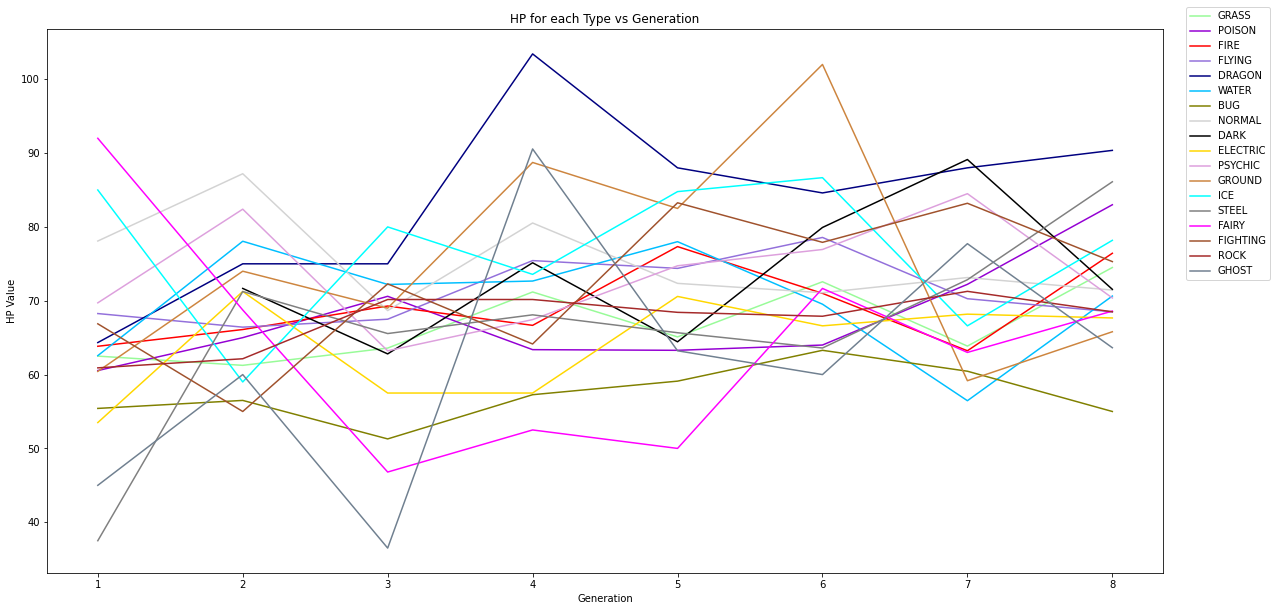

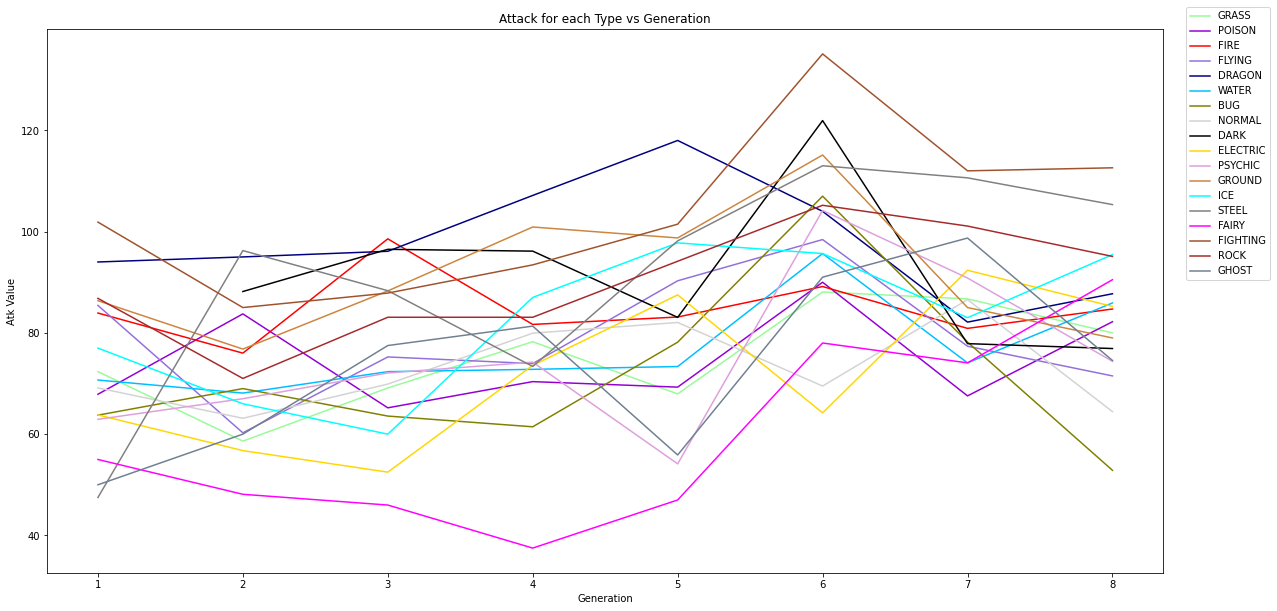

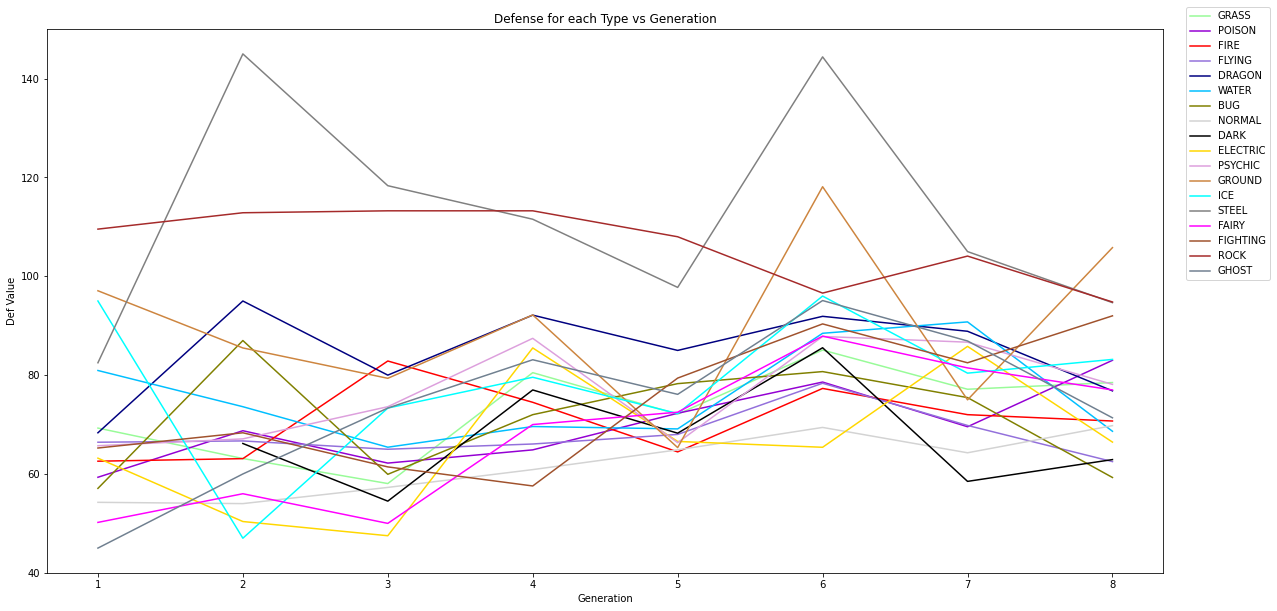

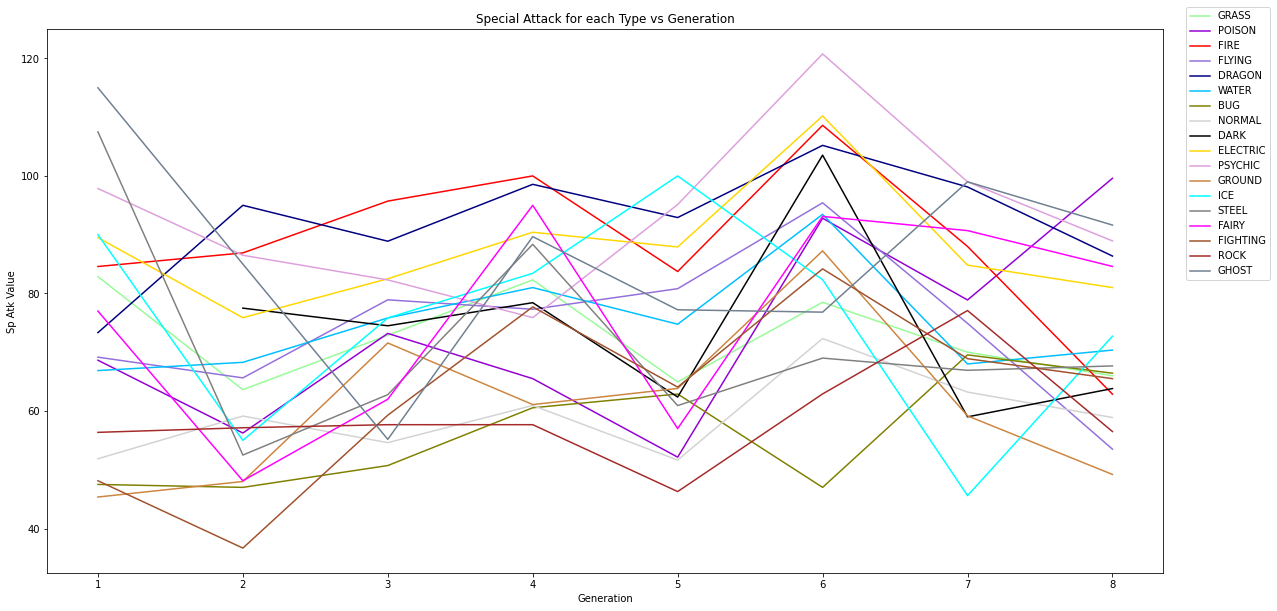

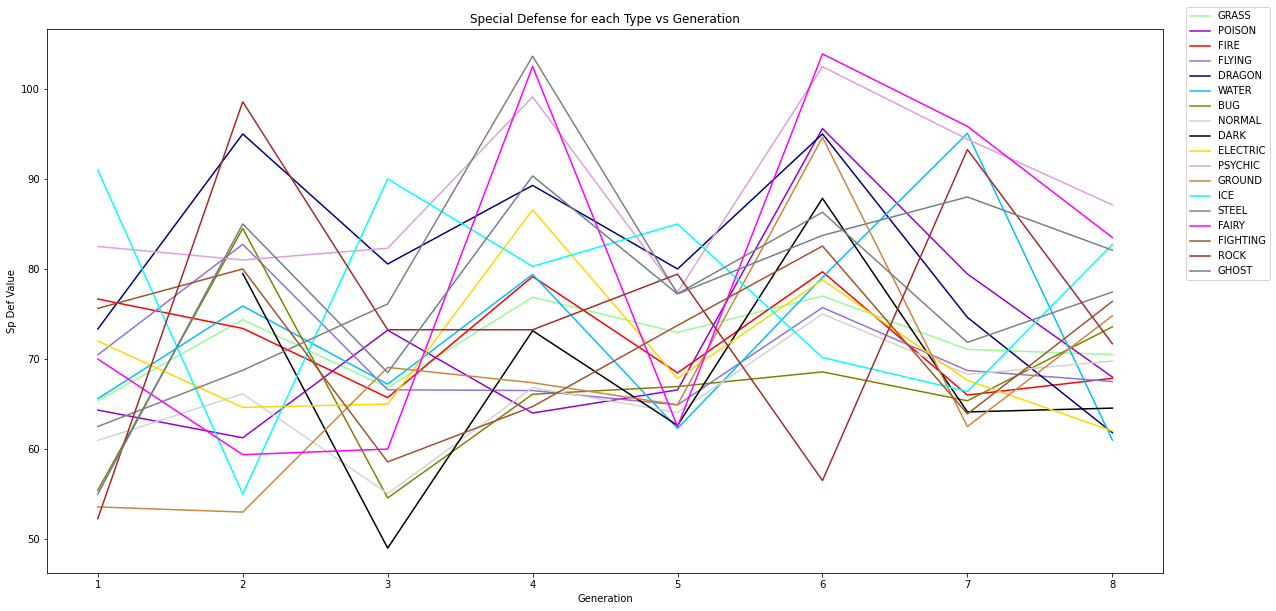

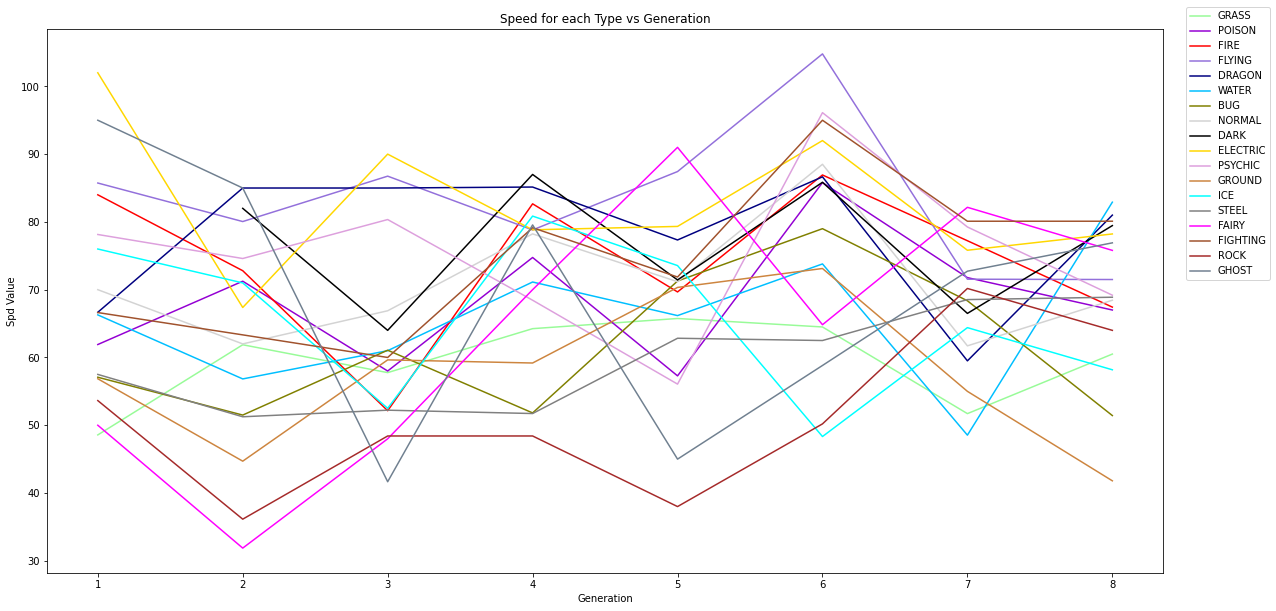

In [124]:
#Now that we did all of that to track changes, it's time to make some graphs to help visualize
plt.figure(figsize=(20,10))
plt.title("HP for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("HP Value")
for index, row in hpChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Attack for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Atk Value")
for index, row in atkChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Defense for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Def Value")
for index, row in defChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Special Attack for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Sp Atk Value")
for index, row in spAtkChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Special Defense for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Sp Def Value")
for index, row in spDefChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Speed for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Spd Value")
for index, row in speedChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

So before we go further, we'd like to clarify why we placed every type onto one of 6 plots. We could have made 18 plots (one for each type) and tracked how each type has changed when only looking at itself. By creating 6 large plots, we are able to see not only how they change over time for one category but how they compare to the competitors. We will be primarily looking at high level patterns in these plots, instea of analyzing all 18 plots for changes over time.

Generation 1 stands out for having the largest difference in values for every type. While most generations see a significant amount of types clustered around one range, generation 1's values are very loose and spread out. Generation 2 was interesting because it featured some of the lowest stat values for every type across all of time, but it also features a few anomalous highs for the 2 defensive stats. Generation 3 had many tight but but reasonably high values altogether. Many stat values reach record highs around generation 4 and 6. There's no logical explanation for why generation 4 pokemon are much stronger, but using domain knowledge about pokemon we know that gen 6 spiked due to the introduction of mega evoltions. Mega evolutions upgrade all of a pokemon stats to new highs, which would naturally make many values in that generation stand out. From generation 5 to 8, we generally see a growth in stats for most types up to generation 7 before seeing a slight decrease for generation 8. These are generalizations, however, because every plot has a different shape.

### 6. Let's compute average role values overall
Earlier during the tidying stage, we added in 5 new columns based off some equations that the community determined for basis usage analysis. We will be performing data analysis on these 5 columns using similar methods as we did in sections 1-5.

In [5]:
AverageRoles = [df["Ph. Sweeper"].mean(), df["Sp. Sweeper"].mean(), df["Wall"].mean(), df["Ph. Tank"].mean(), df["Sp. Tank"].mean()]
AverageRoles

[148.6479842674533,
 141.1425762045231,
 216.32940019665682,
 154.69419862340217,
 144.88790560471978]

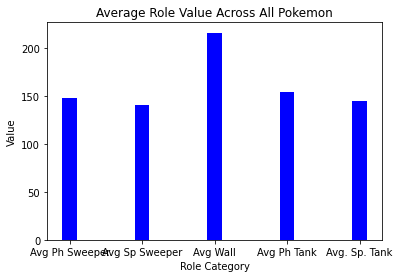

In [6]:
plt.bar(["Avg Ph Sweeper", "Avg Sp Sweeper", "Avg Wall", "Avg Ph Tank", "Avg. Sp. Tank"], AverageRoles, color="blue", width=.2)
plt.title("Average Role Value Across All Pokemon");
plt.xlabel("Role Category");
plt.ylabel("Value");

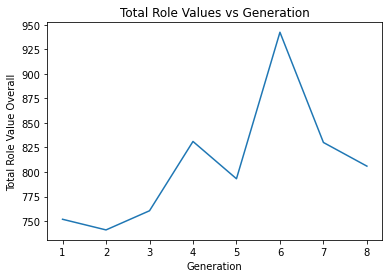

In [7]:
G1 = sum([df[df["Generation"] == 1]["Ph. Sweeper"].mean(), df[df["Generation"] == 1]["Sp. Sweeper"].mean(), df[df["Generation"] == 1]["Wall"].mean(), 
     df[df["Generation"] == 1]["Ph. Tank"].mean(), df[df["Generation"] == 1]["Sp. Tank"].mean()])
G2 = sum([df[df["Generation"] == 2]["Ph. Sweeper"].mean(), df[df["Generation"] == 2]["Sp. Sweeper"].mean(), df[df["Generation"] == 2]["Wall"].mean(), 
     df[df["Generation"] == 2]["Ph. Tank"].mean(), df[df["Generation"] == 2]["Sp. Tank"].mean()])
G3 = sum([df[df["Generation"] == 3]["Ph. Sweeper"].mean(), df[df["Generation"] == 3]["Sp. Sweeper"].mean(), df[df["Generation"] == 3]["Wall"].mean(), 
     df[df["Generation"] == 3]["Ph. Tank"].mean(), df[df["Generation"] == 3]["Sp. Tank"].mean()])
G4 = sum([df[df["Generation"] == 4]["Ph. Sweeper"].mean(), df[df["Generation"] == 4]["Sp. Sweeper"].mean(), df[df["Generation"] == 4]["Wall"].mean(), 
     df[df["Generation"] == 4]["Ph. Tank"].mean(), df[df["Generation"] == 4]["Sp. Tank"].mean()])
G5 = sum([df[df["Generation"] == 5]["Ph. Sweeper"].mean(), df[df["Generation"] == 5]["Sp. Sweeper"].mean(), df[df["Generation"] == 5]["Wall"].mean(), 
     df[df["Generation"] == 5]["Ph. Tank"].mean(), df[df["Generation"] == 5]["Sp. Tank"].mean()])
G6 = sum([df[df["Generation"] == 6]["Ph. Sweeper"].mean(), df[df["Generation"] == 6]["Sp. Sweeper"].mean(), df[df["Generation"] == 6]["Wall"].mean(), 
     df[df["Generation"] == 6]["Ph. Tank"].mean(), df[df["Generation"] == 6]["Sp. Tank"].mean()])
G7 = sum([df[df["Generation"] == 7]["Ph. Sweeper"].mean(), df[df["Generation"] == 7]["Sp. Sweeper"].mean(), df[df["Generation"] == 7]["Wall"].mean(), 
     df[df["Generation"] == 7]["Ph. Tank"].mean(), df[df["Generation"] == 7]["Sp. Tank"].mean()])
G8 = sum([df[df["Generation"] == 8]["Ph. Sweeper"].mean(), df[df["Generation"] == 8]["Sp. Sweeper"].mean(), df[df["Generation"] == 8]["Wall"].mean(), 
     df[df["Generation"] == 8]["Ph. Tank"].mean(), df[df["Generation"] == 8]["Sp. Tank"].mean()])
plt.plot([1,2,3,4,5,6,7,8],[G1,G2,G3,G4,G5,G6,G7,G8])
plt.title("Total Role Values vs Generation")
plt.xlabel("Generation")
plt.ylabel("Total Role Value Overall")
plt.show()

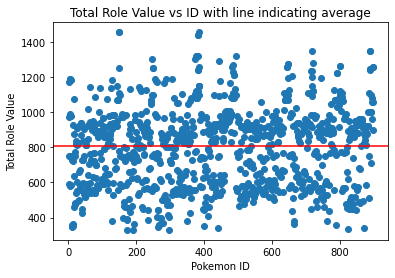

In [8]:
plt.scatter(df["ID"],df["Total Role"])
plt.axhline(sum(AverageRoles), color="red")
plt.title("Total Role Value vs ID with line indicating average")
plt.xlabel("Pokemon ID");
plt.ylabel("Total Role Value");

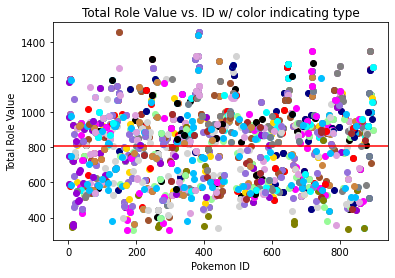

In [13]:
fig, ax = plt.subplots()
plt.axhline(sum(AverageRoles), color="red");
for label, obs in df.groupby("Type(s)"):
    for t in label.split("/"): #There can be two types, so we need both
        ax.scatter(obs["ID"],obs["Total Role"], c=mainTypes[t], label=label)
        ax.set_xlabel("Pokemon ID")
        ax.set_ylabel("Total Role Value")
        plt.title("Total Role Value vs. ID w/ color indicating type")

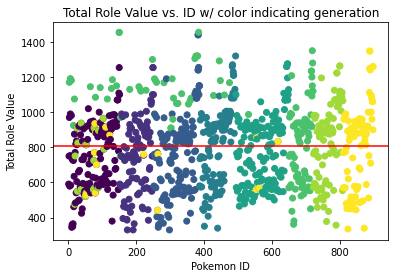

In [14]:
plt.scatter(df["ID"],df["Total Role"], c=df["Generation"])
plt.axhline(sum(AverageRoles), color="red");
plt.title("Total Role Value vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Total Role Value");

Generally speaking, the graphs resemble what we saw in step 1. However, the values have been shifted upwards due to the equation combining stats to get a new value. As a whole, I don't expect any major differences other than the larger value at this stage. We are only analyzing the overall values, so we're using the same values to determine new columns. That said, some of the old columns are used for more than once so that may lead to larger values than expected. This can be confirmed in the role graphs in the next section.

### 7. Did any generation fall short or above for role values?

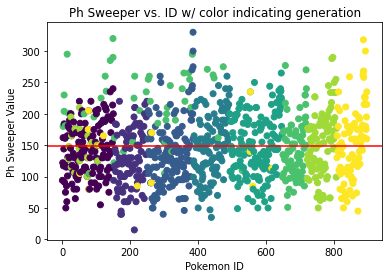

In [25]:
plt.scatter(df["ID"],df["Ph. Sweeper"],c=df["Generation"])
plt.axhline(AverageRoles[0], color="red");
plt.title("Ph Sweeper vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Ph Sweeper Value");

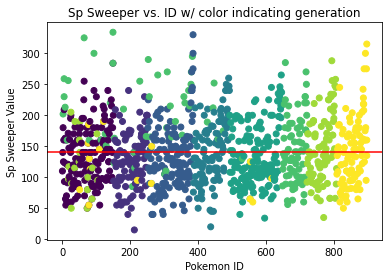

In [26]:
plt.scatter(df["ID"],df["Sp. Sweeper"],c=df["Generation"])
plt.axhline(AverageRoles[1], color="red");
plt.title("Sp Sweeper vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Sp Sweeper Value");

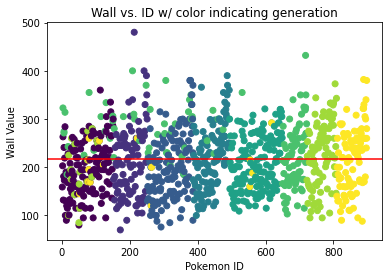

In [27]:
plt.scatter(df["ID"],df["Wall"],c=df["Generation"])
plt.axhline(AverageRoles[2], color="red");
plt.title("Wall vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Wall Value");

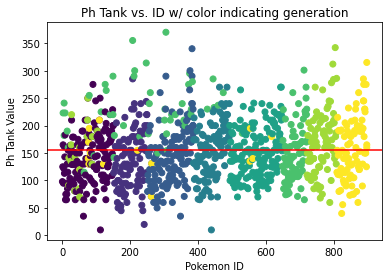

In [28]:
plt.scatter(df["ID"],df["Ph. Tank"],c=df["Generation"])
plt.axhline(AverageRoles[3], color="red");
plt.title("Ph Tank vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Ph Tank Value");

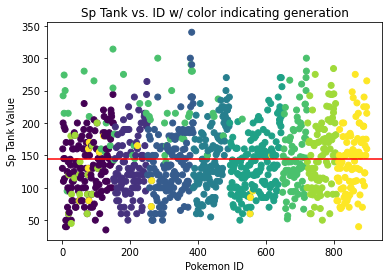

In [30]:
plt.scatter(df["ID"],df["Sp. Tank"],c=df["Generation"])
plt.axhline(AverageRoles[4], color="red");
plt.title("Sp Tank vs. ID w/ color indicating generation");
plt.xlabel("Pokemon ID");
plt.ylabel("Sp Tank Value");

Similar to last time, many values are clusterd closely around each other. There are high and low values, so it's hard to tell if there is a pattern across the board until we do further analysis in the next few steps. Again there are higher values overall, and there seems to be some new values that are extremely high that weren't present before.

### 8. Did average role values change over 8 generations?

In [33]:
genRoleValues = df.groupby("Generation").mean()
genRoleValues = genRoleValues.drop(["ID", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Total Stat Values"], 1)
genRoleValues

Ph. Sweeper  Sp. Sweeper        Wall    Ph. Tank    Sp. Tank  \
Generation                                                                 
1            142.411765   136.614379  198.379085  141.091503  133.346405   
2            129.418367   125.561224  212.255102  137.459184  136.306122   
3            139.021429   133.957143  203.885714  145.578571  138.064286   
4            150.275862   145.577586  226.362069  157.206897  151.663793   
5            150.142857   138.782609  210.888199  154.186335  139.105590   
6            172.452381   167.365079  245.952381  181.960317  174.587302   
7            152.902655   140.769912  223.327434  165.097345  147.955752   
8            151.163636   139.590909  217.027273  156.745455  141.418182   

            Total Role  
Generation              
1           751.843137  
2           741.000000  
3           760.507143  
4           831.086207  
5           793.105590  
6           942.317460  
7           830.053097  
8           805.945455

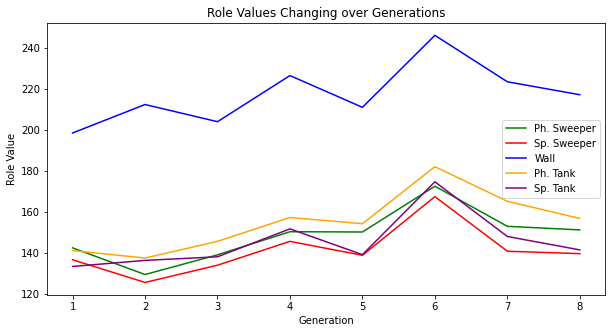

In [35]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4,5,6,7,8], genRoleValues["Ph. Sweeper"], c = "green", label="Ph. Sweeper")
plt.plot([1,2,3,4,5,6,7,8], genRoleValues["Sp. Sweeper"], c = "red", label="Sp. Sweeper")
plt.plot([1,2,3,4,5,6,7,8], genRoleValues["Wall"], c = "blue", label="Wall")
plt.plot([1,2,3,4,5,6,7,8], genRoleValues["Ph. Tank"], c = "orange", label="Ph. Tank")
plt.plot([1,2,3,4,5,6,7,8], genRoleValues["Sp. Tank"], c = "purple", label="Sp. Tank")
plt.title("Role Values Changing over Generations")
plt.xlabel("Generation")
plt.ylabel("Role Value")
plt.legend()
plt.show()

So this section differs a little bit from the corresponding one. We're seeing how each role value has changed across each generation. Each of the 5 line graphs all have the same shape across the generation, which is unexpected and interesting because this did not happen in the other graph. In addition, the wall graph is so much higher than the rest and isn't touching the rest of the graphs in this plot. In the previous plot, all graphs were close by.

### 9. Let's compute average role values for each of the 18 types

In [38]:
phSweeper, spSweeper, wall, phTank, spTank = {}, {}, {}, {}, {}
seenBefore = set() #Have we seen this type yet

for index, row in df.iterrows():
    for pType in row["Type(s)"].split("/"): 
        if pType in seenBefore:
            phSweeper[pType].append(row["HP"])
            spSweeper[pType].append(row["Attack"])
            wall[pType].append(row["Defense"])
            phTank[pType].append(row["Sp. Atk"])
            spTank[pType].append(row["Sp. Def"])
        else: 
            seenBefore.add(pType)
            phSweeper[pType] = [row["HP"]]
            spSweeper[pType] = [row["Attack"]]
            wall[pType] = [row["Defense"]]
            phTank[pType] = [row["Sp. Atk"]]
            spTank[pType] = [row["Sp. Def"]]
for key in phSweeper:
    phSweeper[key] = np.nanmean(np.array(phSweeper[key]))
    spSweeper[key] = np.nanmean(np.array(spSweeper[key]))
    wall[key] = np.nanmean(np.array(wall[key]))
    phTank[key] = np.nanmean(np.array(phTank[key]))
    spTank[key] = np.nanmean(np.array(spTank[key]))
phSweeper

{'GRASS': 66.7433628318584,
 'POISON': 65.07894736842105,
 'FIRE': 69.60759493670886,
 'FLYING': 71.42241379310344,
 'DRAGON': 86.09859154929578,
 'WATER': 69.80666666666667,
 'BUG': 57.05555555555556,
 'NORMAL': 75.672,
 'DARK': 72.59154929577464,
 'ELECTRIC': 64.28169014084507,
 'PSYCHIC': 72.67241379310344,
 'GROUND': 75.225,
 'ICE': 77.61111111111111,
 'STEEL': 69.21428571428571,
 'FAIRY': 67.36507936507937,
 'FIGHTING': 75.29577464788733,
 'ROCK': 68.27397260273973,
 'GHOST': 65.78688524590164}

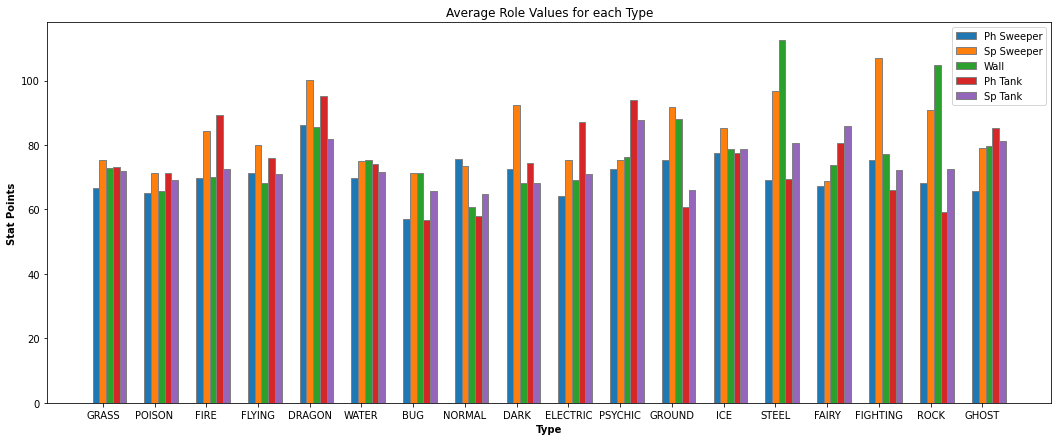

In [45]:
barWidth = 0.13
fig = plt.subplots(figsize =(18, 7)) 

b1 = np.arange(18) 
b2 = [x + barWidth for x in b1] 
b3 = [x + barWidth for x in b2]
b4 = [x + barWidth for x in b3] 
b5 = [x + barWidth for x in b4] 

#Plot the bar
plt.bar(b1, list(phSweeper.values()),  width = barWidth, 
        edgecolor ='grey', label ='Ph Sweeper') 
plt.bar(b2, list(spSweeper.values()), width = barWidth, 
        edgecolor ='grey', label ='Sp Sweeper') 
plt.bar(b3, list(wall.values()), width = barWidth, 
        edgecolor ='grey', label ='Wall')
plt.bar(b4, list(phTank.values()), width = barWidth, 
        edgecolor ='grey', label ='Ph Tank')
plt.bar(b5, list(spTank.values()), width = barWidth, 
        edgecolor ='grey', label ='Sp Tank')

#Label the bars
plt.title("Average Role Values for each Type")
plt.xlabel('Type', fontweight ='bold') 
plt.ylabel('Stat Points', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(list(phSweeper.values())))], 
           ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING",
           "ROCK", "GHOST"]) 
plt.legend()
plt.show() 

We could do an extensive analysis on these 18 groups of bargraphs, but the pattern is very similar to last time minus the higher starting points as is the norm. It's still hard to tell if anything has improved over time, despite having overall values here. So in the next section, let's track how these averages have changed over time. In other words, how has each type's role changed for each generation?

### 10. Let's see how the 18 types role averages have changed over 8 generations

In [149]:
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

phSweep1, spSweep1, wall1, phTank1, spTank1 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
phSweep2, spSweep2, wall2, phTank2, spTank2 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
phSweep3, spSweep3, wall3, phTank3, spTank3 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
phSweep4, spSweep4, wall4, phTank4, spTank4 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
phSweep5, spSweep5, wall5, phTank5, spTank5 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
phSweep6, spSweep6, wall6, phTank6, spTank6 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
phSweep7, spSweep7, wall7, phTank7, spTank7 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
phSweep8, spSweep8, wall8, phTank8, spTank8 = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

for index, row in df.iterrows():
    for pType in row["Type(s)"].split("/"):
        if row["Generation"] == 1:
            phSweep1[pType].append(row["Ph. Sweeper"])
            spSweep1[pType].append(row["Sp. Sweeper"])
            wall1[pType].append(row["Wall"])
            phTank1[pType].append(row["Ph. Tank"])
            spTank1[pType].append(row["Sp. Tank"])
        elif row["Generation"] == 2:
            phSweep2[pType].append(row["Ph. Sweeper"])
            spSweep2[pType].append(row["Sp. Sweeper"])
            wall2[pType].append(row["Wall"])
            phTank2[pType].append(row["Ph. Tank"])
            spTank2[pType].append(row["Sp. Tank"])
        elif row["Generation"] == 3:
            phSweep3[pType].append(row["Ph. Sweeper"])
            spSweep3[pType].append(row["Sp. Sweeper"])
            wall3[pType].append(row["Wall"])
            phTank3[pType].append(row["Ph. Tank"])
            spTank3[pType].append(row["Sp. Tank"])
        elif row["Generation"] == 4:
            phSweep4[pType].append(row["Ph. Sweeper"])
            spSweep4[pType].append(row["Sp. Sweeper"])
            wall4[pType].append(row["Wall"])
            phTank4[pType].append(row["Ph. Tank"])
            spTank4[pType].append(row["Sp. Tank"])
        elif row["Generation"] == 5:
            phSweep5[pType].append(row["Ph. Sweeper"])
            spSweep5[pType].append(row["Sp. Sweeper"])
            wall5[pType].append(row["Wall"])
            phTank5[pType].append(row["Ph. Tank"])
            spTank5[pType].append(row["Sp. Tank"])
        elif row["Generation"] == 6:
            phSweep6[pType].append(row["Ph. Sweeper"])
            spSweep6[pType].append(row["Sp. Sweeper"])
            wall6[pType].append(row["Wall"])
            phTank6[pType].append(row["Ph. Tank"])
            spTank6[pType].append(row["Sp. Tank"])
        elif row["Generation"] == 7:
            phSweep7[pType].append(row["Ph. Sweeper"])
            spSweep7[pType].append(row["Sp. Sweeper"])
            wall7[pType].append(row["Wall"])
            phTank7[pType].append(row["Ph. Tank"])
            spTank7[pType].append(row["Sp. Tank"])
        elif row["Generation"] == 8:
            phSweep8[pType].append(row["Ph. Sweeper"])
            spSweep8[pType].append(row["Sp. Sweeper"])
            wall8[pType].append(row["Wall"])
            phTank8[pType].append(row["Ph. Tank"])
            spTank8[pType].append(row["Sp. Tank"])            
for key in phSweeper:
    phSweep1[key] = np.nanmean(np.array(phSweep1[key]))
    spSweep1[key] = np.nanmean(np.array(spSweep1[key]))
    wall1[key] = np.nanmean(np.array(wall1[key]))
    phTank1[key] = np.nanmean(np.array(phTank1[key]))
    spTank1[key] = np.nanmean(np.array(spTank1[key]))
    
    phSweep2[key] = np.nanmean(np.array(phSweep2[key]))
    spSweep2[key] = np.nanmean(np.array(spSweep2[key]))
    wall2[key] = np.nanmean(np.array(wall2[key]))
    phTank2[key] = np.nanmean(np.array(phTank2[key]))
    spTank2[key] = np.nanmean(np.array(spTank2[key]))
    
    phSweep3[key] = np.nanmean(np.array(phSweep3[key]))
    spSweep3[key] = np.nanmean(np.array(spSweep3[key]))
    wall3[key] = np.nanmean(np.array(wall3[key]))
    phTank3[key] = np.nanmean(np.array(phTank3[key]))
    spTank3[key] = np.nanmean(np.array(spTank3[key]))
    
    phSweep4[key] = np.nanmean(np.array(phSweep4[key]))
    spSweep4[key] = np.nanmean(np.array(spSweep4[key]))
    wall4[key] = np.nanmean(np.array(wall4[key]))
    phTank4[key] = np.nanmean(np.array(phTank4[key]))
    spTank4[key] = np.nanmean(np.array(spTank4[key]))
    
    phSweep5[key] = np.nanmean(np.array(phSweep5[key]))
    spSweep5[key] = np.nanmean(np.array(spSweep5[key]))
    wall5[key] = np.nanmean(np.array(wall5[key]))
    phTank5[key] = np.nanmean(np.array(phTank5[key]))
    spTank5[key] = np.nanmean(np.array(spTank5[key]))
    
    phSweep6[key] = np.nanmean(np.array(phSweep6[key]))
    spSweep6[key] = np.nanmean(np.array(spSweep6[key]))
    wall6[key] = np.nanmean(np.array(wall6[key]))
    phTank6[key] = np.nanmean(np.array(phTank6[key]))
    spTank6[key] = np.nanmean(np.array(spTank6[key]))
    
    phSweep7[key] = np.nanmean(np.array(phSweep7[key]))
    spSweep7[key] = np.nanmean(np.array(spSweep7[key]))
    wall7[key] = np.nanmean(np.array(wall7[key]))
    phTank7[key] = np.nanmean(np.array(phTank7[key]))
    spTank7[key] = np.nanmean(np.array(spTank7[key]))
    
    phSweep8[key] = np.nanmean(np.array(phSweep8[key]))
    spSweep8[key] = np.nanmean(np.array(spSweep8[key]))
    wall8[key] = np.nanmean(np.array(wall8[key]))
    phTank8[key] = np.nanmean(np.array(phTank8[key]))
    spTank8[key] = np.nanmean(np.array(spTank8[key]))

phSweepChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [phSweep1["GRASS"], phSweep1["POISON"], phSweep1["FIRE"],phSweep1["FLYING"],phSweep1["DRAGON"],phSweep1["WATER"],phSweep1["BUG"],phSweep1["NORMAL"],phSweep1["DARK"],phSweep1["ELECTRIC"],phSweep1["PSYCHIC"],phSweep1["GROUND"],phSweep1["ICE"],phSweep1["STEEL"],phSweep1["FAIRY"],phSweep1["FIGHTING"],phSweep1["ROCK"],phSweep1["GHOST"]],
       'G2': [phSweep2["GRASS"], phSweep2["POISON"], phSweep2["FIRE"],phSweep2["FLYING"],phSweep2["DRAGON"],phSweep2["WATER"],phSweep2["BUG"],phSweep2["NORMAL"],phSweep2["DARK"],phSweep2["ELECTRIC"],phSweep2["PSYCHIC"],phSweep2["GROUND"],phSweep2["ICE"],phSweep2["STEEL"],phSweep2["FAIRY"],phSweep2["FIGHTING"],phSweep2["ROCK"],phSweep2["GHOST"]],
       'G3': [phSweep3["GRASS"], phSweep3["POISON"], phSweep3["FIRE"],phSweep3["FLYING"],phSweep3["DRAGON"],phSweep3["WATER"],phSweep3["BUG"],phSweep3["NORMAL"],phSweep3["DARK"],phSweep3["ELECTRIC"],phSweep3["PSYCHIC"],phSweep3["GROUND"],phSweep3["ICE"],phSweep3["STEEL"],phSweep3["FAIRY"],phSweep3["FIGHTING"],phSweep3["ROCK"],phSweep3["GHOST"]],
       'G4': [phSweep4["GRASS"], phSweep4["POISON"], phSweep4["FIRE"],phSweep4["FLYING"],phSweep4["DRAGON"],phSweep4["WATER"],phSweep4["BUG"],phSweep4["NORMAL"],phSweep4["DARK"],phSweep4["ELECTRIC"],phSweep4["PSYCHIC"],phSweep4["GROUND"],phSweep4["ICE"],phSweep4["STEEL"],phSweep4["FAIRY"],phSweep4["FIGHTING"],phSweep3["ROCK"],phSweep4["GHOST"]],
       'G5': [phSweep5["GRASS"], phSweep5["POISON"], phSweep5["FIRE"],phSweep5["FLYING"],phSweep5["DRAGON"],phSweep5["WATER"],phSweep5["BUG"],phSweep5["NORMAL"],phSweep5["DARK"],phSweep5["ELECTRIC"],phSweep5["PSYCHIC"],phSweep5["GROUND"],phSweep5["ICE"],phSweep5["STEEL"],phSweep5["FAIRY"],phSweep5["FIGHTING"],phSweep4["ROCK"],phSweep5["GHOST"]],
       'G6': [phSweep6["GRASS"], phSweep6["POISON"], phSweep6["FIRE"],phSweep6["FLYING"],phSweep6["DRAGON"],phSweep6["WATER"],phSweep6["BUG"],phSweep6["NORMAL"],phSweep6["DARK"],phSweep6["ELECTRIC"],phSweep6["PSYCHIC"],phSweep6["GROUND"],phSweep6["ICE"],phSweep6["STEEL"],phSweep6["FAIRY"],phSweep6["FIGHTING"],phSweep5["ROCK"],phSweep6["GHOST"]],
       'G7': [phSweep7["GRASS"], phSweep7["POISON"], phSweep7["FIRE"],phSweep7["FLYING"],phSweep7["DRAGON"],phSweep7["WATER"],phSweep7["BUG"],phSweep7["NORMAL"],phSweep7["DARK"],phSweep7["ELECTRIC"],phSweep7["PSYCHIC"],phSweep7["GROUND"],phSweep7["ICE"],phSweep7["STEEL"],phSweep7["FAIRY"],phSweep7["FIGHTING"],phSweep6["ROCK"],phSweep7["GHOST"]],
       'G8': [phSweep8["GRASS"], phSweep8["POISON"], phSweep8["FIRE"],phSweep8["FLYING"],phSweep8["DRAGON"],phSweep8["WATER"],phSweep8["BUG"],phSweep8["NORMAL"],phSweep8["DARK"],phSweep8["ELECTRIC"],phSweep8["PSYCHIC"],phSweep8["GROUND"],phSweep8["ICE"],phSweep8["STEEL"],phSweep8["FAIRY"],phSweep8["FIGHTING"],phSweep7["ROCK"],phSweep8["GHOST"]]}
phSweepChange = pd.DataFrame(phSweepChange)

spSweepChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [spSweep1["GRASS"], spSweep1["POISON"], spSweep1["FIRE"],spSweep1["FLYING"],spSweep1["DRAGON"],spSweep1["WATER"],spSweep1["BUG"],spSweep1["NORMAL"],spSweep1["DARK"],spSweep1["ELECTRIC"],spSweep1["PSYCHIC"],spSweep1["GROUND"],spSweep1["ICE"],spSweep1["STEEL"],spSweep1["FAIRY"],spSweep1["FIGHTING"],spSweep1["ROCK"],spSweep1["GHOST"]],
       'G2': [spSweep2["GRASS"], spSweep2["POISON"], spSweep2["FIRE"],spSweep2["FLYING"],spSweep2["DRAGON"],spSweep2["WATER"],spSweep2["BUG"],spSweep2["NORMAL"],spSweep2["DARK"],spSweep2["ELECTRIC"],spSweep2["PSYCHIC"],spSweep2["GROUND"],spSweep2["ICE"],spSweep2["STEEL"],spSweep2["FAIRY"],spSweep2["FIGHTING"],spSweep2["ROCK"],spSweep2["GHOST"]],
       'G3': [spSweep3["GRASS"], spSweep3["POISON"], spSweep3["FIRE"],spSweep3["FLYING"],spSweep3["DRAGON"],spSweep3["WATER"],spSweep3["BUG"],spSweep3["NORMAL"],spSweep3["DARK"],spSweep3["ELECTRIC"],spSweep3["PSYCHIC"],spSweep3["GROUND"],spSweep3["ICE"],spSweep3["STEEL"],spSweep3["FAIRY"],spSweep3["FIGHTING"],spSweep3["ROCK"],spSweep3["GHOST"]],
       'G4': [spSweep4["GRASS"], spSweep4["POISON"], spSweep4["FIRE"],spSweep4["FLYING"],spSweep4["DRAGON"],spSweep4["WATER"],spSweep4["BUG"],spSweep4["NORMAL"],spSweep4["DARK"],spSweep4["ELECTRIC"],spSweep4["PSYCHIC"],spSweep4["GROUND"],spSweep4["ICE"],spSweep4["STEEL"],spSweep4["FAIRY"],spSweep4["FIGHTING"],spSweep3["ROCK"],spSweep4["GHOST"]],
       'G5': [spSweep5["GRASS"], spSweep5["POISON"], spSweep5["FIRE"],spSweep5["FLYING"],spSweep5["DRAGON"],spSweep5["WATER"],spSweep5["BUG"],spSweep5["NORMAL"],spSweep5["DARK"],spSweep5["ELECTRIC"],spSweep5["PSYCHIC"],spSweep5["GROUND"],spSweep5["ICE"],spSweep5["STEEL"],spSweep5["FAIRY"],spSweep5["FIGHTING"],spSweep4["ROCK"],spSweep5["GHOST"]],
       'G6': [spSweep6["GRASS"], spSweep6["POISON"], spSweep6["FIRE"],spSweep6["FLYING"],spSweep6["DRAGON"],spSweep6["WATER"],spSweep6["BUG"],spSweep6["NORMAL"],spSweep6["DARK"],spSweep6["ELECTRIC"],spSweep6["PSYCHIC"],spSweep6["GROUND"],spSweep6["ICE"],spSweep6["STEEL"],spSweep6["FAIRY"],spSweep6["FIGHTING"],spSweep5["ROCK"],spSweep6["GHOST"]],
       'G7': [spSweep7["GRASS"], spSweep7["POISON"], spSweep7["FIRE"],spSweep7["FLYING"],spSweep7["DRAGON"],spSweep7["WATER"],spSweep7["BUG"],spSweep7["NORMAL"],spSweep7["DARK"],spSweep7["ELECTRIC"],spSweep7["PSYCHIC"],spSweep7["GROUND"],spSweep7["ICE"],spSweep7["STEEL"],spSweep7["FAIRY"],spSweep7["FIGHTING"],spSweep6["ROCK"],spSweep7["GHOST"]],
       'G8': [spSweep8["GRASS"], spSweep8["POISON"], spSweep8["FIRE"],spSweep8["FLYING"],spSweep8["DRAGON"],spSweep8["WATER"],spSweep8["BUG"],spSweep8["NORMAL"],spSweep8["DARK"],spSweep8["ELECTRIC"],spSweep8["PSYCHIC"],spSweep8["GROUND"],spSweep8["ICE"],spSweep8["STEEL"],spSweep8["FAIRY"],spSweep8["FIGHTING"],spSweep7["ROCK"],spSweep8["GHOST"]]}
spSweepChange = pd.DataFrame(spSweepChange)

wallChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [wall1["GRASS"], wall1["POISON"], wall1["FIRE"],wall1["FLYING"],wall1["DRAGON"],wall1["WATER"],wall1["BUG"],wall1["NORMAL"],wall1["DARK"],wall1["ELECTRIC"],wall1["PSYCHIC"],wall1["GROUND"],wall1["ICE"],wall1["STEEL"],wall1["FAIRY"],wall1["FIGHTING"],wall1["ROCK"],wall1["GHOST"]],
       'G2': [wall2["GRASS"], wall2["POISON"], wall2["FIRE"],wall2["FLYING"],wall2["DRAGON"],wall2["WATER"],wall2["BUG"],wall2["NORMAL"],wall2["DARK"],wall2["ELECTRIC"],wall2["PSYCHIC"],wall2["GROUND"],wall2["ICE"],wall2["STEEL"],wall2["FAIRY"],wall2["FIGHTING"],wall2["ROCK"],wall2["GHOST"]],
       'G3': [wall3["GRASS"], wall3["POISON"], wall3["FIRE"],wall3["FLYING"],wall3["DRAGON"],wall3["WATER"],wall3["BUG"],wall3["NORMAL"],wall3["DARK"],wall3["ELECTRIC"],wall3["PSYCHIC"],wall3["GROUND"],wall3["ICE"],wall3["STEEL"],wall3["FAIRY"],wall3["FIGHTING"],wall3["ROCK"],wall3["GHOST"]],
       'G4': [wall4["GRASS"], wall4["POISON"], wall4["FIRE"],wall4["FLYING"],wall4["DRAGON"],wall4["WATER"],wall4["BUG"],wall4["NORMAL"],wall4["DARK"],wall4["ELECTRIC"],wall4["PSYCHIC"],wall4["GROUND"],wall4["ICE"],wall4["STEEL"],wall4["FAIRY"],wall4["FIGHTING"],wall3["ROCK"],wall4["GHOST"]],
       'G5': [wall5["GRASS"], wall5["POISON"], wall5["FIRE"],wall5["FLYING"],wall5["DRAGON"],wall5["WATER"],wall5["BUG"],wall5["NORMAL"],wall5["DARK"],wall5["ELECTRIC"],wall5["PSYCHIC"],wall5["GROUND"],wall5["ICE"],wall5["STEEL"],wall5["FAIRY"],wall5["FIGHTING"],wall4["ROCK"],wall5["GHOST"]],
       'G6': [wall6["GRASS"], wall6["POISON"], wall6["FIRE"],wall6["FLYING"],wall6["DRAGON"],wall6["WATER"],wall6["BUG"],wall6["NORMAL"],wall6["DARK"],wall6["ELECTRIC"],wall6["PSYCHIC"],wall6["GROUND"],wall6["ICE"],wall6["STEEL"],wall6["FAIRY"],wall6["FIGHTING"],wall5["ROCK"],wall6["GHOST"]],
       'G7': [wall7["GRASS"], wall7["POISON"], wall7["FIRE"],wall7["FLYING"],wall7["DRAGON"],wall7["WATER"],wall7["BUG"],wall7["NORMAL"],wall7["DARK"],wall7["ELECTRIC"],wall7["PSYCHIC"],wall7["GROUND"],wall7["ICE"],wall7["STEEL"],wall7["FAIRY"],wall7["FIGHTING"],wall6["ROCK"],wall7["GHOST"]],
       'G8': [wall8["GRASS"], wall8["POISON"], wall8["FIRE"],wall8["FLYING"],wall8["DRAGON"],wall8["WATER"],wall8["BUG"],wall8["NORMAL"],wall8["DARK"],wall8["ELECTRIC"],wall8["PSYCHIC"],wall8["GROUND"],wall8["ICE"],wall8["STEEL"],wall8["FAIRY"],wall8["FIGHTING"],wall7["ROCK"],wall8["GHOST"]]}
wallChange = pd.DataFrame(wallChange)

phTankChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [phTank1["GRASS"], phTank1["POISON"], phTank1["FIRE"],phTank1["FLYING"],phTank1["DRAGON"],phTank1["WATER"],phTank1["BUG"],phTank1["NORMAL"],phTank1["DARK"],phTank1["ELECTRIC"],phTank1["PSYCHIC"],phTank1["GROUND"],phTank1["ICE"],phTank1["STEEL"],phTank1["FAIRY"],phTank1["FIGHTING"],phTank1["ROCK"],phTank1["GHOST"]],
       'G2': [phTank2["GRASS"], phTank2["POISON"], phTank2["FIRE"],phTank2["FLYING"],phTank2["DRAGON"],phTank2["WATER"],phTank2["BUG"],phTank2["NORMAL"],phTank2["DARK"],phTank2["ELECTRIC"],phTank2["PSYCHIC"],phTank2["GROUND"],phTank2["ICE"],phTank2["STEEL"],phTank2["FAIRY"],phTank2["FIGHTING"],phTank2["ROCK"],phTank2["GHOST"]],
       'G3': [phTank3["GRASS"], phTank3["POISON"], phTank3["FIRE"],phTank3["FLYING"],phTank3["DRAGON"],phTank3["WATER"],phTank3["BUG"],phTank3["NORMAL"],phTank3["DARK"],phTank3["ELECTRIC"],phTank3["PSYCHIC"],phTank3["GROUND"],phTank3["ICE"],phTank3["STEEL"],phTank3["FAIRY"],phTank3["FIGHTING"],phTank3["ROCK"],phTank3["GHOST"]],
       'G4': [phTank4["GRASS"], phTank4["POISON"], phTank4["FIRE"],phTank4["FLYING"],phTank4["DRAGON"],phTank4["WATER"],phTank4["BUG"],phTank4["NORMAL"],phTank4["DARK"],phTank4["ELECTRIC"],phTank4["PSYCHIC"],phTank4["GROUND"],phTank4["ICE"],phTank4["STEEL"],phTank4["FAIRY"],phTank4["FIGHTING"],phTank3["ROCK"],phTank4["GHOST"]],
       'G5': [phTank5["GRASS"], phTank5["POISON"], phTank5["FIRE"],phTank5["FLYING"],phTank5["DRAGON"],phTank5["WATER"],phTank5["BUG"],phTank5["NORMAL"],phTank5["DARK"],phTank5["ELECTRIC"],phTank5["PSYCHIC"],phTank5["GROUND"],phTank5["ICE"],phTank5["STEEL"],phTank5["FAIRY"],phTank5["FIGHTING"],phTank4["ROCK"],phTank5["GHOST"]],
       'G6': [phTank6["GRASS"], phTank6["POISON"], phTank6["FIRE"],phTank6["FLYING"],phTank6["DRAGON"],phTank6["WATER"],phTank6["BUG"],phTank6["NORMAL"],phTank6["DARK"],phTank6["ELECTRIC"],phTank6["PSYCHIC"],phTank6["GROUND"],phTank6["ICE"],phTank6["STEEL"],phTank6["FAIRY"],phTank6["FIGHTING"],phTank5["ROCK"],phTank6["GHOST"]],
       'G7': [phTank7["GRASS"], phTank7["POISON"], phTank7["FIRE"],phTank7["FLYING"],phTank7["DRAGON"],phTank7["WATER"],phTank7["BUG"],phTank7["NORMAL"],phTank7["DARK"],phTank7["ELECTRIC"],phTank7["PSYCHIC"],phTank7["GROUND"],phTank7["ICE"],phTank7["STEEL"],phTank7["FAIRY"],phTank7["FIGHTING"],phTank6["ROCK"],phTank7["GHOST"]],
       'G8': [phTank8["GRASS"], phTank8["POISON"], phTank8["FIRE"],phTank8["FLYING"],phTank8["DRAGON"],phTank8["WATER"],phTank8["BUG"],phTank8["NORMAL"],phTank8["DARK"],phTank8["ELECTRIC"],phTank8["PSYCHIC"],phTank8["GROUND"],phTank8["ICE"],phTank8["STEEL"],phTank8["FAIRY"],phTank8["FIGHTING"],phTank7["ROCK"],phTank8["GHOST"]]}
phTankChange = pd.DataFrame(phTankChange)

spTankChange = {"Type": ['GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', "BUG", "NORMAL", "DARK", "ELECTRIC", "PSYCHIC", "GROUND", "ICE", "STEEL", "FAIRY", "FIGHTING", "ROCK", "GHOST"],
        'G1': [spTank1["GRASS"], spTank1["POISON"], spTank1["FIRE"],spTank1["FLYING"],spTank1["DRAGON"],spTank1["WATER"],spTank1["BUG"],spTank1["NORMAL"],spTank1["DARK"],spTank1["ELECTRIC"],spTank1["PSYCHIC"],spTank1["GROUND"],spTank1["ICE"],spTank1["STEEL"],spTank1["FAIRY"],spTank1["FIGHTING"],spTank1["ROCK"],spTank1["GHOST"]],
       'G2': [spTank2["GRASS"], spTank2["POISON"], spTank2["FIRE"],spTank2["FLYING"],spTank2["DRAGON"],spTank2["WATER"],spTank2["BUG"],spTank2["NORMAL"],spTank2["DARK"],spTank2["ELECTRIC"],spTank2["PSYCHIC"],spTank2["GROUND"],spTank2["ICE"],spTank2["STEEL"],spTank2["FAIRY"],spTank2["FIGHTING"],spTank2["ROCK"],spTank2["GHOST"]],
       'G3': [spTank3["GRASS"], spTank3["POISON"], spTank3["FIRE"],spTank3["FLYING"],spTank3["DRAGON"],spTank3["WATER"],spTank3["BUG"],spTank3["NORMAL"],spTank3["DARK"],spTank3["ELECTRIC"],spTank3["PSYCHIC"],spTank3["GROUND"],spTank3["ICE"],spTank3["STEEL"],spTank3["FAIRY"],spTank3["FIGHTING"],spTank3["ROCK"],spTank3["GHOST"]],
       'G4': [spTank4["GRASS"], spTank4["POISON"], spTank4["FIRE"],spTank4["FLYING"],spTank4["DRAGON"],spTank4["WATER"],spTank4["BUG"],spTank4["NORMAL"],spTank4["DARK"],spTank4["ELECTRIC"],spTank4["PSYCHIC"],spTank4["GROUND"],spTank4["ICE"],spTank4["STEEL"],spTank4["FAIRY"],spTank4["FIGHTING"],spTank3["ROCK"],spTank4["GHOST"]],
       'G5': [spTank5["GRASS"], spTank5["POISON"], spTank5["FIRE"],spTank5["FLYING"],spTank5["DRAGON"],spTank5["WATER"],spTank5["BUG"],spTank5["NORMAL"],spTank5["DARK"],spTank5["ELECTRIC"],spTank5["PSYCHIC"],spTank5["GROUND"],spTank5["ICE"],spTank5["STEEL"],spTank5["FAIRY"],spTank5["FIGHTING"],spTank4["ROCK"],spTank5["GHOST"]],
       'G6': [spTank6["GRASS"], spTank6["POISON"], spTank6["FIRE"],spTank6["FLYING"],spTank6["DRAGON"],spTank6["WATER"],spTank6["BUG"],spTank6["NORMAL"],spTank6["DARK"],spTank6["ELECTRIC"],spTank6["PSYCHIC"],spTank6["GROUND"],spTank6["ICE"],spTank6["STEEL"],spTank6["FAIRY"],spTank6["FIGHTING"],spTank5["ROCK"],spTank6["GHOST"]],
       'G7': [spTank7["GRASS"], spTank7["POISON"], spTank7["FIRE"],spTank7["FLYING"],spTank7["DRAGON"],spTank7["WATER"],spTank7["BUG"],spTank7["NORMAL"],spTank7["DARK"],spTank7["ELECTRIC"],spTank7["PSYCHIC"],spTank7["GROUND"],spTank7["ICE"],spTank7["STEEL"],spTank7["FAIRY"],spTank7["FIGHTING"],spTank6["ROCK"],spTank7["GHOST"]],
       'G8': [spTank8["GRASS"], spTank8["POISON"], spTank8["FIRE"],spTank8["FLYING"],spTank8["DRAGON"],spTank8["WATER"],spTank8["BUG"],spTank8["NORMAL"],spTank8["DARK"],spTank8["ELECTRIC"],spTank8["PSYCHIC"],spTank8["GROUND"],spTank8["ICE"],spTank8["STEEL"],spTank8["FAIRY"],spTank8["FIGHTING"],spTank7["ROCK"],spTank8["GHOST"]]}
spTankChange = pd.DataFrame(spTankChange)

phSweepChange

Type          G1          G2          G3          G4          G5  \
0      GRASS  120.928571  120.500000  126.882353  142.500000  133.700000   
1     POISON  129.787879  155.000000  123.200000  145.125000  126.571429   
2       FIRE  167.916667  148.800000  150.714286  164.333333  152.800000   
3     FLYING  171.157895  140.315789  162.000000  152.750000  177.714286   
4     DRAGON  160.666667  180.000000  181.111111  192.285714  195.333333   
5      WATER  136.968750  124.944444  133.344828  143.933333  139.529412   
6        BUG  120.833333  120.500000  124.642857  113.272727  149.444444   
7     NORMAL  139.130435  125.133333  136.777778  158.176471  153.235294   
8       DARK         NaN  170.166667  160.500000  183.142857  154.500000   
9   ELECTRIC  165.800000  124.125000  142.500000  152.416667  166.833333   
10   PSYCHIC  141.071429  141.600000  152.434783  142.666667  110.200000   
11    GROUND  143.214286  121.500000  147.928571  160.090909  169.083333   
12       ICE  153.000000  137.000000  112.500000  167.857143  171.333333   
13     STEEL  105.000000  147.500000  140.555556  125.090909  161.000000   
14     FAIRY  105.000000   80.000000   94.000000  107.500000  138.000000   
15  FIGHTING  168.500000  148.333333  147.857143  172.571429  173.333333   
16      ROCK  140.454545  107.142857  131.500000  131.500000  132.142857   
17     GHOST  145.000000  145.000000  119.166667  160.888889  100.888889   

            G6          G7          G8  
0   152.571429  138.428571  140.500000  
1   175.800000  139.333333  149.200000  
2   176.076923  158.111111  152.142857  
3   203.214286  148.909091  143.000000  
4   190.650000  141.625000  168.727273  
5   169.466667  122.615385  168.818182  
6   186.000000  146.545455  104.285714  
7   158.000000  148.285714  132.888889  
8   207.769231  144.375000  156.363636  
9   156.200000  168.181818  163.444444  
10  200.294118  170.083333  143.562500  
11  188.250000  140.000000  120.800000  
12  144.000000  147.400000  153.636364  
13  175.500000  179.153846  174.222222  
14  142.833333  156.230769  166.300000  
15  230.090909  192.100000  192.700000  
16  155.400000  171.272727  159.100000  
17  149.818182  171.454545  151.454545

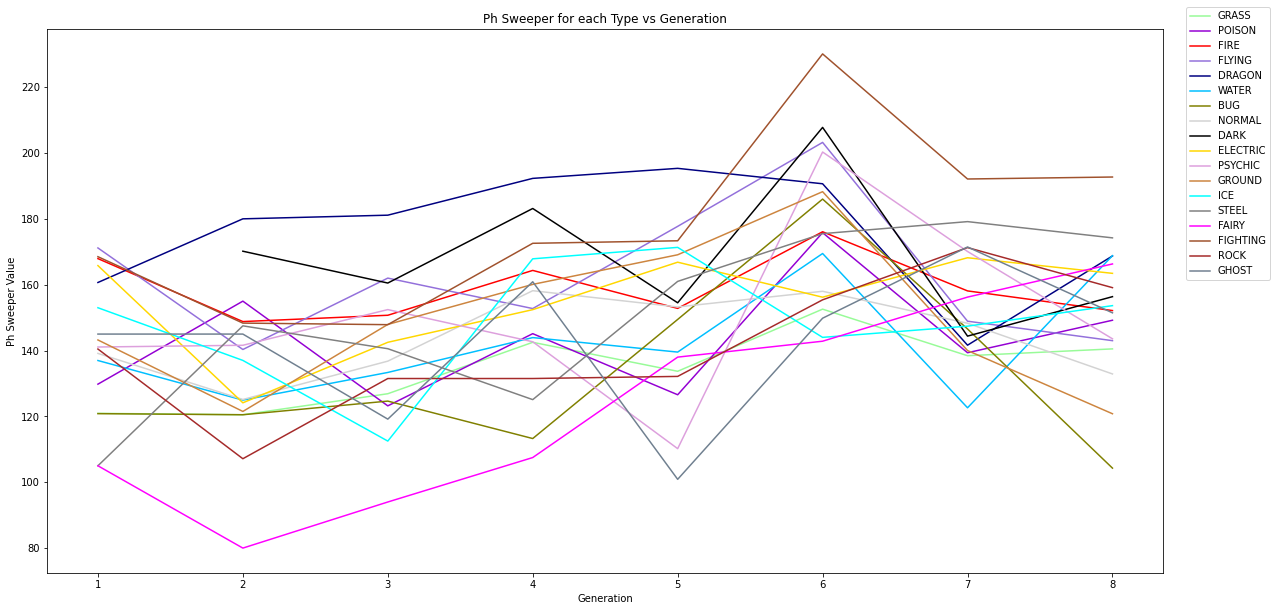

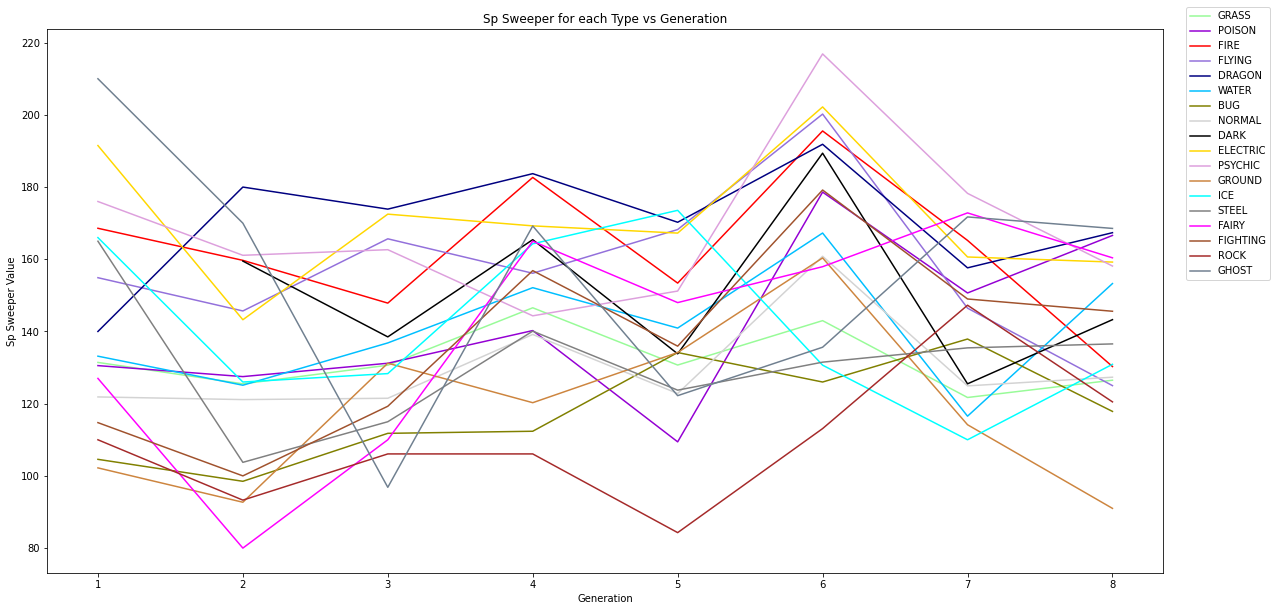

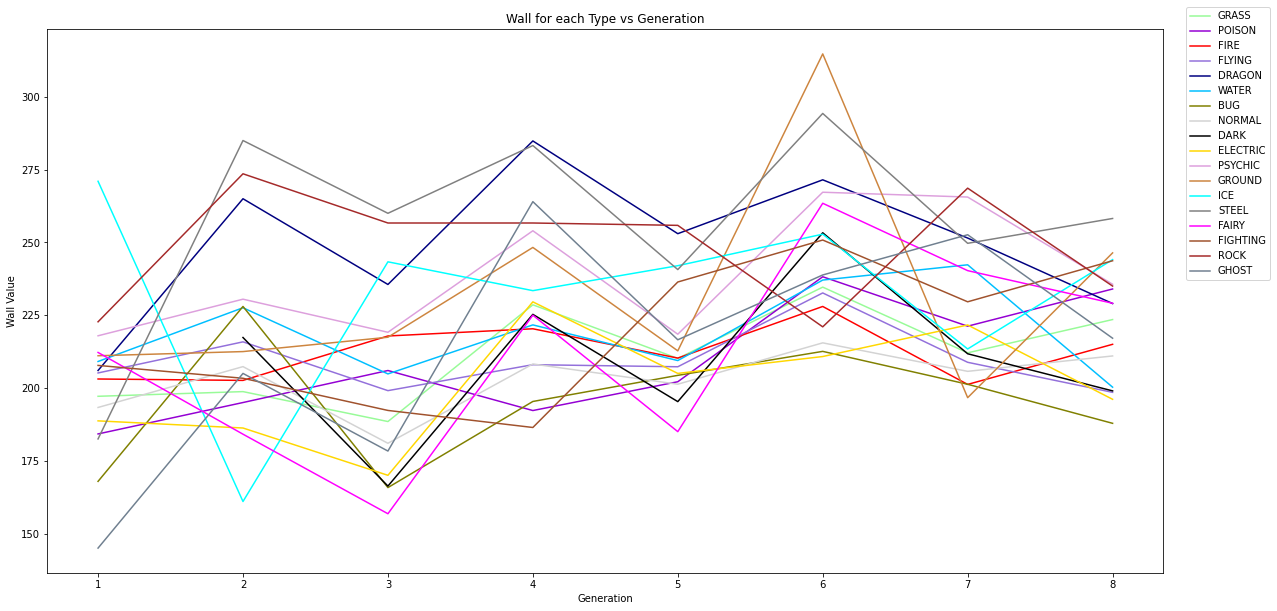

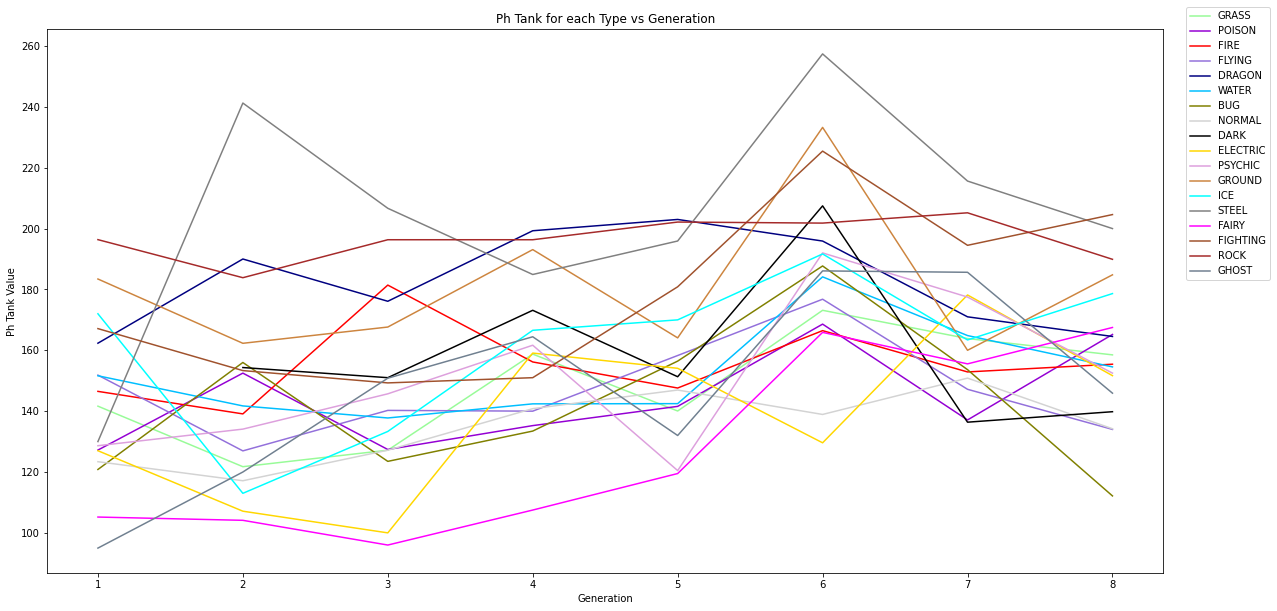

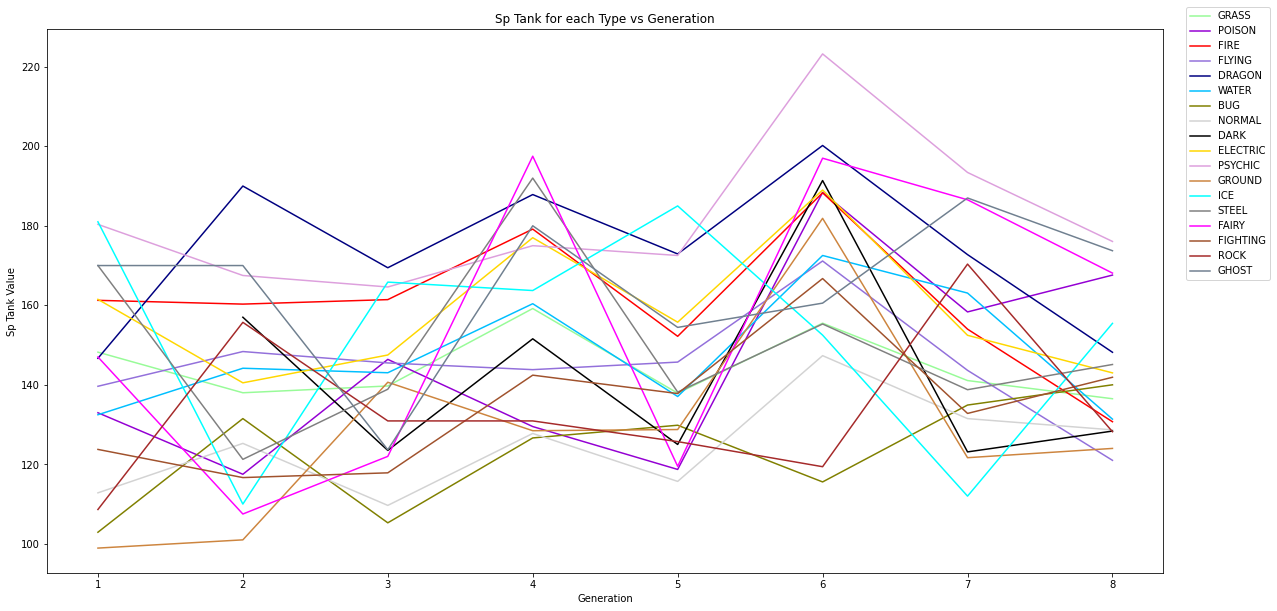

In [150]:
plt.figure(figsize=(20,10))
plt.title("Ph Sweeper for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Ph Sweeper Value")
for index, row in phSweepChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Sp Sweeper for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Sp Sweeper Value")
for index, row in spSweepChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Wall for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Wall Value")
for index, row in wallChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Ph Tank for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Ph Tank Value")
for index, row in phTankChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Sp Tank for each Type vs Generation")
plt.xlabel("Generation")
plt.ylabel("Sp Tank Value")
for index, row in spTankChange.iterrows():    
    plt.plot([1,2,3,4,5,6,7,8], [row["G1"],row["G2"],row["G3"],row["G4"],row["G5"],row["G6"],row["G7"],row["G8"]], c=mainTypes[row["Type"]], label=row["Type"])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

Now that we have done analysis for each type showing how their specific average role value has changed, we can take it a step further and try to predict what the following generations to come will have in store: what will their type's role values be if we were to predict it?

## IV. Predictions
Before we go onto the next step of this tutorial, let’s briefly summarize what we have done so far. We’ve done data analysis on the complete Pokedex (list of all Pokemon) to look for patterns over 8 generations. We looked at collective stat and role values as a whole, but we have also looked at how each type’s values have changed over time.

In this next portion, we will be employing linear regression on the 18 types to if we can predict what the average stat and role value of the next generation will be. The null hypothesis will be there is no relation between generation and stat and role value, but we will be rejecting this. Based off what we have seen with the data analysis, there has been generally a gradual but steady increase with every generation

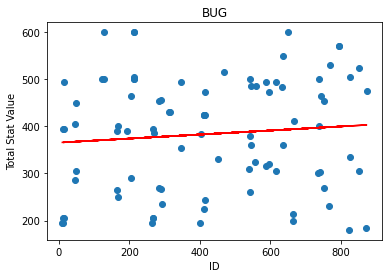

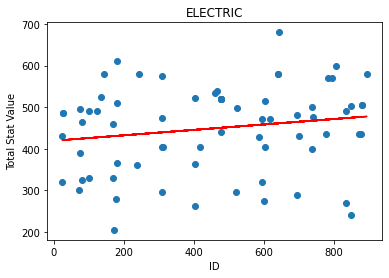

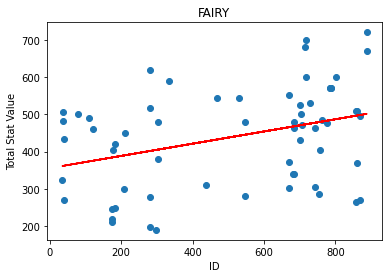

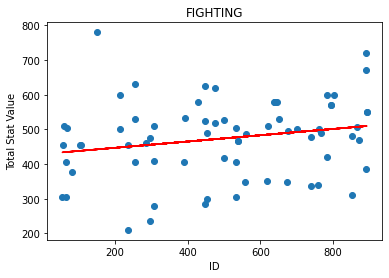

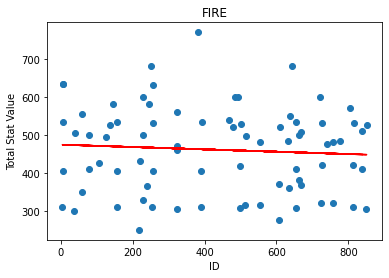

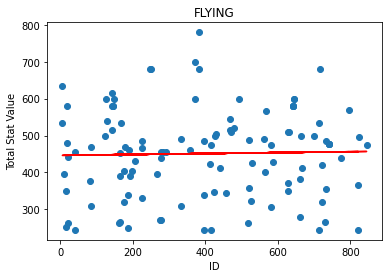

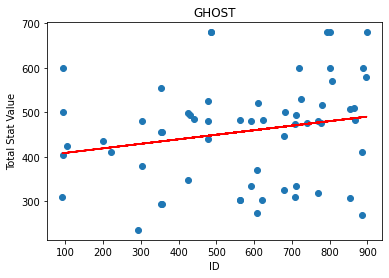

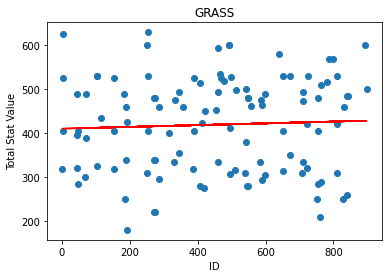

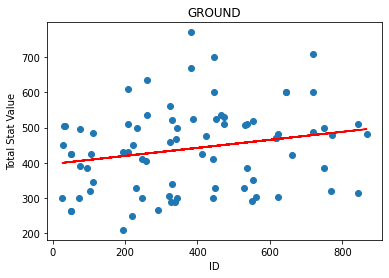

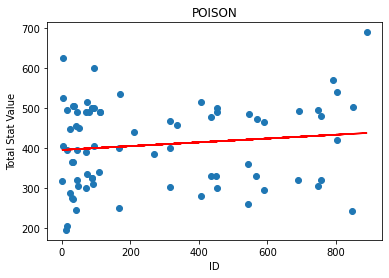

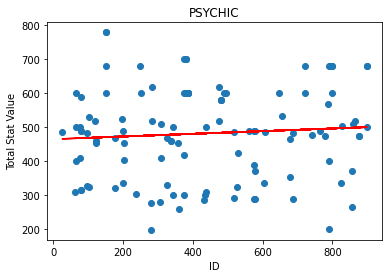

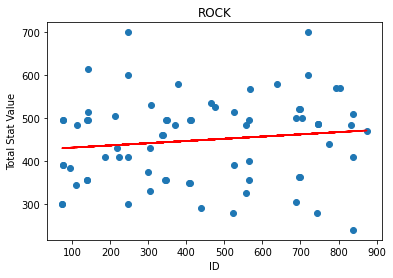

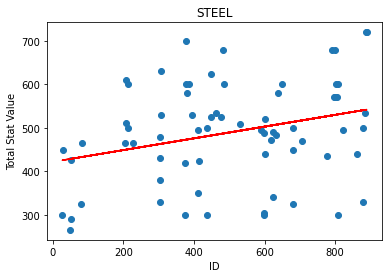

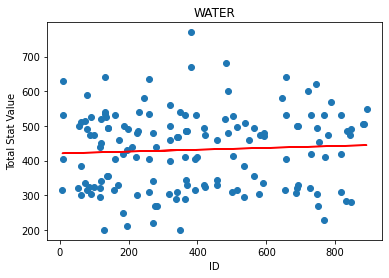

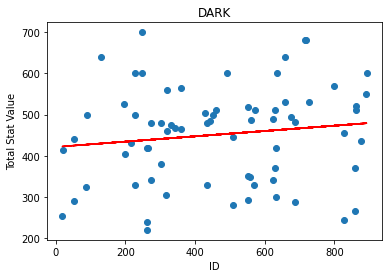

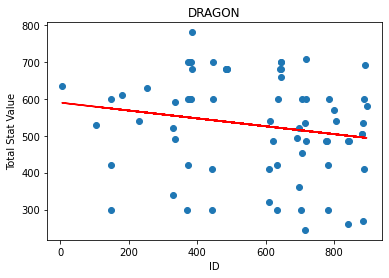

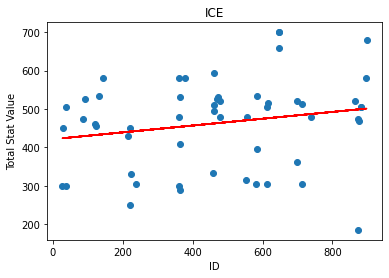

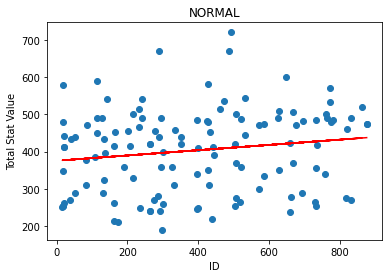

In [156]:
from sklearn.linear_model import LinearRegression

#Create 2 dictionaries: every type is associated with an np array storing ID and total
idX, totalY, roleY = {}, {}, {}
for label, obs in df.groupby("Type(s)"):
    for pType in label.split("/"):
        if pType in idX:
            idX[pType] = np.concatenate((idX[pType],np.array(obs["ID"])))
            totalY[pType] = np.concatenate((totalY[pType],np.array(obs["Total Stat Values"])))
            roleY[pType] = np.concatenate((roleY[pType],np.array(obs["Total Role"])))
        else:
            idX[pType] = np.array(obs["ID"])
            totalY[pType] = np.array(obs["Total Stat Values"])
            roleY[pType] = np.array(obs["Total Role"])

#Create an x and y dataset of points where x is the ID and y is the total stat value. Create a linear regression and plot it on the plot with the points
for key in idX:
    fig, ax = plt.subplots()
    ax.set_xlabel("ID")
    ax.set_ylabel("Total Stat Value")
    plt.title(key)
    
    x,y = idX[key], totalY[key]
    linreg = LinearRegression()
    x = x.reshape(-1,1)
    linreg.fit(x,y)
    y_pred = linreg.predict(x)
    plt.scatter(x,y)
    plt.plot(x,y_pred, "RED")

    #If you're interested in seeing the intercept and growth rate for each type, this would be the command
    #print(linreg.coef_)
    #print(linreg.intercept_)
    #Use this command if you want to predict a type's ID value
    #print(linreg.predict([[900]]))

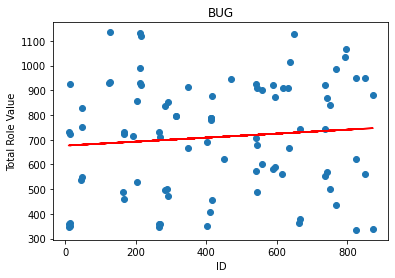

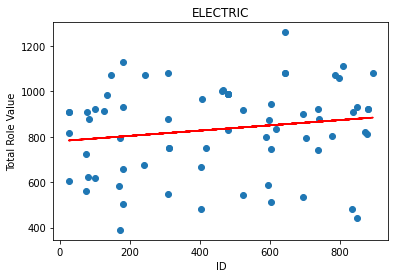

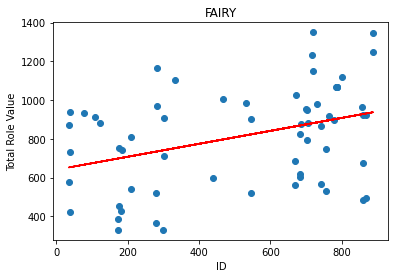

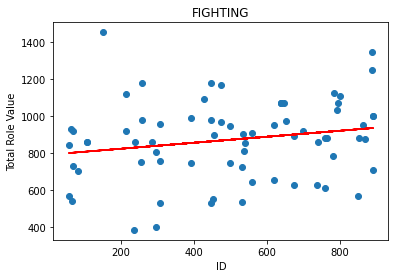

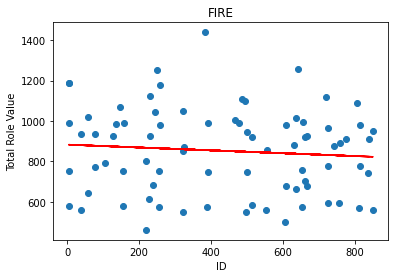

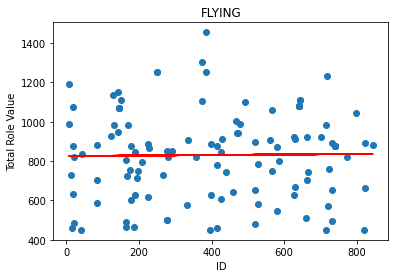

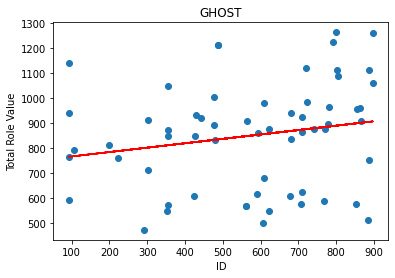

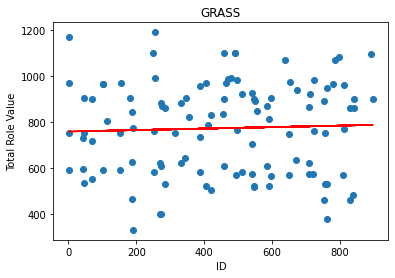

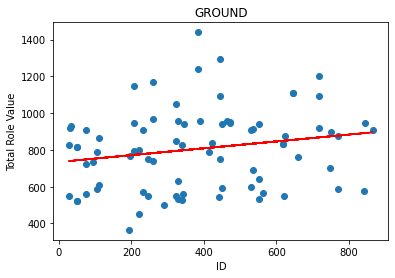

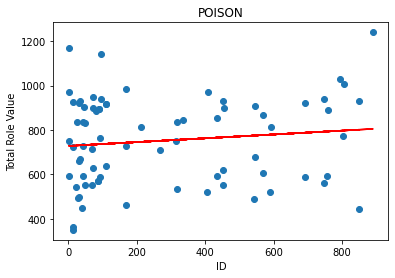

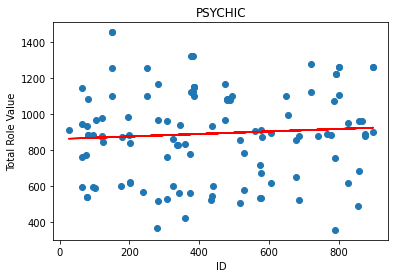

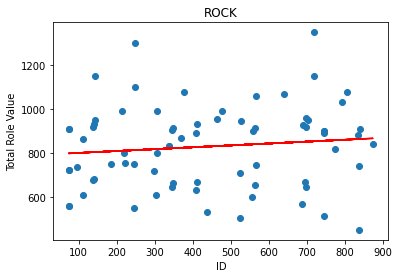

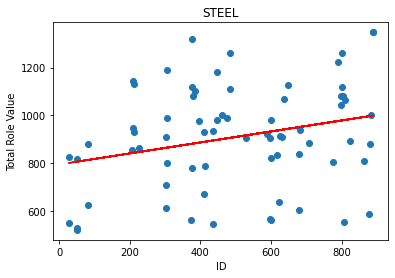

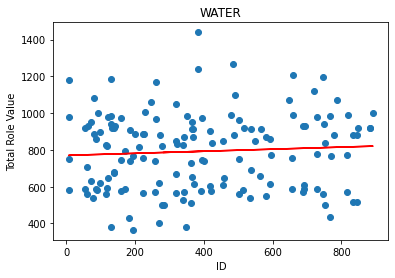

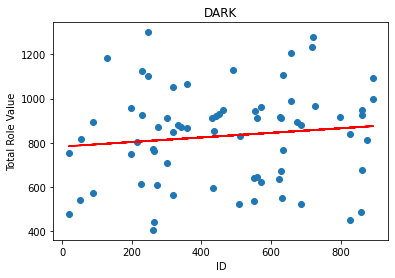

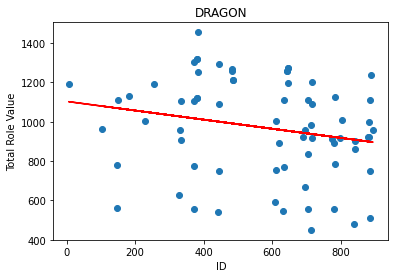

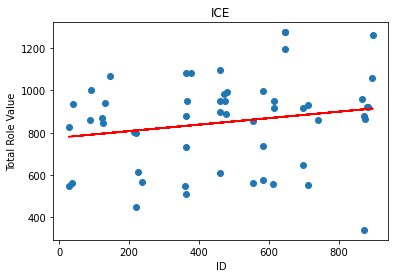

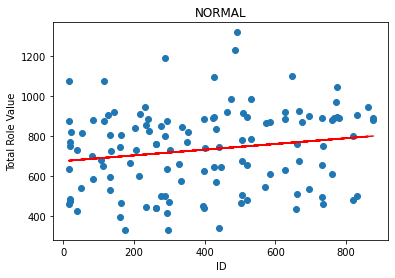

In [161]:
for key in idX:
    fig, ax = plt.subplots()
    ax.set_xlabel("ID")
    ax.set_ylabel("Total Role Value")
    plt.title(key)
    
    x,y = idX[key], roleY[key]
    
    linreg = LinearRegression()
    x = x.reshape(-1,1)
    linreg.fit(x,y)
    y_pred = linreg.predict(x)
    plt.scatter(x,y)
    plt.plot(x,y_pred, "RED")

We used linear regression on each type to see a prediction on its affiliated total stat and role values. Earlier, we stated we were rejecting our null hypothesis of no relation between generation and total stat/role values. I still believe that it should be rejected because each plot generally shows an upwards trend in relation to time. There are a few exceptions such as "fire" and "dragon" going downwards, but that is still a relation nonetheless. In the comments above, lines of code were included in case someone was interested in looking at the coefficient or y-intercept. In addition, you can also type in an ID, existing or otherwise, for each type to predict what the total role or stat values would be. If you wanted to expand this linear regression model say for a specific type's role or stat, then only a few simple changes have to be done to the code. Just change the dicionary to record those column values as well. For the linear regression model, we only applied it to the total stat/role values to predict overall trends.

## V. Conclusions/Takeaways
In this extensive tutorial, we examined the complete Pokedex to see how stat values have changed over time, how types have changed over time, and how every generation compares to each other. From there, we used this knowledge to perform linear regression to see if there was a general pattern despite the wavy graph patterns. We noticed that despite this pattern, Pokemon have been getting stronger over time for almost every type.
 
Before another generation drops, someone who's interested in the competitive side of this franchise may be interested in running the linear regression model to predict how viable a new Pokemon may be when it's ID is released. If someone is really interested in a type, they can look at the graphs we showed to look for causes. If someone wants to find out what type is most suited for a playing role, our tutorial also helped show a basic way of doing so. For someone who’s interested in Pokemon and learning more about the statistical side of the game, this tutorial helps start someone on that track.